Team members: 
Xuewei Zhang,
Antonio Reybol Jr.,
Colin Brence,
Yilei Zhang


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from tqdm import tqdm

import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
 
from sklearn.decomposition import PCA

import time

pd.set_option("max_columns",None)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fep_dataset.csv to fep_dataset.csv


# **Part 1: Reading in data and investigating**


### 1.1 Read Data

In [ ]:
### Part 1: Reading in data 
fep_data= pd.read_csv("fep_dataset.csv")

In [ ]:
fep_data.head()

,Cohort,Accommodation,Admitted_Hosp,Age,Alcohol,Citizenship,Depression_Sev_Scale,Depression_Severity,Drugs,Education,Education_Num,Ethnicity,Gender,Household,M0_Emp,M0_PANSS_G1,M0_PANSS_G10,M0_PANSS_G11,M0_PANSS_G12,M0_PANSS_G13,M0_PANSS_G14,M0_PANSS_G15,M0_PANSS_G16,M0_PANSS_G2,M0_PANSS_G3,M0_PANSS_G4,M0_PANSS_G5,M0_PANSS_G6,M0_PANSS_G7,M0_PANSS_G8,M0_PANSS_G9,M0_PANSS_N1,M0_PANSS_N2,M0_PANSS_N3,M0_PANSS_N4,M0_PANSS_N5,M0_PANSS_N6,M0_PANSS_N7,M0_PANSS_P1,M0_PANSS_P2,M0_PANSS_P3,M0_PANSS_P4,M0_PANSS_P5,M0_PANSS_P6,M0_PANSS_P7,Parent,Relationship,M6_Emp,M6_PANSS_Total_score,M6_Rem,M6_Res,Y1_Emp,Y1_PANSS_Total_score,Y1_Rem,Y1_Res,Y1_Rem_6
0,FEP,NaN,Hospital,18.0,Yes,UK,NaN,NaN,NaN,Before 16,1.0,White,Female,Alone,No,2.0,2.0,4.0,3.0,1.0,4.0,3.0,1.0,3.0,4.0,1.0,1.0,3.0,2.0,4.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,No,Single,No,76.0,No,No,No,67.0,No,No,No
1,FEP,Private_Family,Not,18.0,Yes,UK,2.0,Moderate,NaN,17 to 18,3.0,White,Female,Parent_Sibs,Yes,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,3.0,1.0,4.0,3.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,No,Single,Yes,46.0,No,No,Yes,36.0,Yes,Yes,No
2,FEP,Homeless,Not,18.0,Yes,UK,1.0,Mild,NaN,At 16,2.0,White,Male,Alone,No,3.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,4.0,3.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,2.0,No,Single,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,FEP,Private_Family,Hospital,17.0,Yes,UK,0.0,None,Yes,Before 16,1.0,White,Female,Parent_Sibs,No,3.0,3.0,4.0,7.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,6.0,1.0,5.0,2.0,4.0,4.0,3.0,3.0,5.0,4.0,3.0,6.0,3.0,5.0,5.0,5.0,3.0,2.0,No,Single,No,66.0,No,Yes,No,63.0,No,Yes,No
4,FEP,Private_Family,Hospital,16.0,No,UK,2.0,Moderate,NaN,At 16,2.0,White,Female,Parent_Sibs,Yes,4.0,2.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,No,Single,Yes,80.0,No,No,Yes,NaN,NaN,NaN,NaN


## 1.2 Change Column Names

In [ ]:
### Changing Column Names to PANSS criteria names
fep_data.rename(columns={"M0_PANSS_G1": "G1: Somatic concern", "M0_PANSS_G10": "G10: Disorientation", "M0_PANSS_G11": "G11: Poor attention", "M0_PANSS_G12": "G12: Lack of judgment and insight", "M0_PANSS_G13": "G13: Disturbance of volition", "M0_PANSS_G14": "G14: Poor impulse control", "M0_PANSS_G15": "G15: Preoccupation", "M0_PANSS_G16": "G16: Active social avoidance", "M0_PANSS_G2": "G2: Anxiety", "M0_PANSS_G3": "G3: Guilt feelings", "M0_PANSS_G4": "G4: Tension", "M0_PANSS_G5": "G5: Mannerisms & posturing", "M0_PANSS_G6": "G6: Depression", "M0_PANSS_G7": "G7: Motor retardation", "M0_PANSS_G8": "G8: Uncooperativeness", "M0_PANSS_G9": "G9: Unusual thought content", "M0_PANSS_N1": "N1: Blunted affect", "M0_PANSS_N2": "N2: Emotional withdrawal", "M0_PANSS_N3": "N3: Poor rapport", "M0_PANSS_N4": "N4: Passive/apathetic social withdrawal", "M0_PANSS_N5": "N5: Difficulty in abstract thinking", "M0_PANSS_N6": "N6: Lack of spontaneity and flow of conversation", "M0_PANSS_N7": "N7: Stereotyped thinking", "M0_PANSS_P1": "P1: Delusions", "M0_PANSS_P2": "P2: Conceptual disorganization", "M0_PANSS_P3": "P3: Hallucinatory behaviour", "M0_PANSS_P4": "P4: Excitement", "M0_PANSS_P5": "P5: Grandiosity", "M0_PANSS_P6": "P6: Suspiciousness", "M0_PANSS_P7": "P7: Hostility"}, inplace = True)
fep_data

,Cohort,Accommodation,Admitted_Hosp,Age,Alcohol,Citizenship,Depression_Sev_Scale,Depression_Severity,Drugs,Education,Education_Num,Ethnicity,Gender,Household,M0_Emp,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,Parent,Relationship,M6_Emp,M6_PANSS_Total_score,M6_Rem,M6_Res,Y1_Emp,Y1_PANSS_Total_score,Y1_Rem,Y1_Res,Y1_Rem_6
0,FEP,NaN,Hospital,18.0,Yes,UK,NaN,NaN,NaN,Before 16,1.0,White,Female,Alone,No,2.0,2.0,4.0,3.0,1.0,4.0,3.0,1.0,3.0,4.0,1.0,1.0,3.0,2.0,4.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,No,Single,No,76.0,No,No,No,67.0,No,No,No
1,FEP,Private_Family,Not,18.0,Yes,UK,2.0,Moderate,NaN,17 to 18,3.0,White,Female,Parent_Sibs,Yes,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,3.0,1.0,4.0,3.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,No,Single,Yes,46.0,No,No,Yes,36.0,Yes,Yes,No
2,FEP,Homeless,Not,18.0,Yes,UK,1.0,Mild,NaN,At 16,2.0,White,Male,Alone,No,3.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,4.0,3.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,2.0,No,Single,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,FEP,Private_Family,Hospital,17.0,Yes,UK,0.0,None,Yes,Before 16,1.0,White,Female,Parent_Sibs,No,3.0,3.0,4.0,7.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,6.0,1.0,5.0,2.0,4.0,4.0,3.0,3.0,5.0,4.0,3.0,6.0,3.0,5.0,5.0,5.0,3.0,2.0,No,Single,No,66.0,No,Yes,No,63.0,No,Yes,No
4,FEP,Private_Family,Hospital,16.0,No,UK,2.0,Moderate,NaN,At 16,2.0,White,Female,Parent_Sibs,Yes,4.0,2.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,No,Single,Yes,80.0,No,No,Yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,CRISP,Private_Family,Hospital,23.0,NaN,UK,NaN,NaN,No,University,5.0,Other,Male,Parent_Sibs,Yes,7.0,1.0,4.0,4.0,1.0,5.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,5.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,No,Single,Yes,37.0,Yes,Yes,NaN,NaN,NaN,NaN,NaN
158,CRISP,Rented,Hospital,21.0,Yes,UK,NaN,NaN,Yes,Before 16,1.0,White,Male,Alone,No,1.0,3.0,4.0,6.0,1.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,6.0,5.0,5.0,5.0,6.0,3.0,5.0,No,Single,No,53.0,Yes,Yes,Yes,54.0,No,Yes,No
159,CRISP,Rented,Not,26.0,Yes,UK,NaN,NaN,Yes,Before 16,1.0,White,Male,Parent_Sibs,No,1.0,2.0,2.0,5.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,3.0,6.0,2.0,1.0,No,Single,No,68.0,No,No,No,80.0,No,No,No
160,CRISP,Rented,Not,32.0,NaN,Other,2.0,Moderate,NaN,University,5.0,White,Male,Friends,Yes,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,1.0,4.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,No,Relationship,Yes,33.0,Yes,Yes,Yes,35.0,Yes,Yes,Yes


In [ ]:
# get percentage of missing values
fep_data.isnull().sum()/fep_data.count()

Cohort                                              0.000000
Accommodation                                       0.058824
Admitted_Hosp                                       0.012500
Age                                                 0.018868
Alcohol                                             0.109589
Citizenship                                         0.006211
Depression_Sev_Scale                                0.306452
Depression_Severity                                 0.306452
Drugs                                               0.246154
Education                                           0.072848
Education_Num                                       0.072848
Ethnicity                                           0.012500
Gender                                              0.000000
Household                                           0.072848
M0_Emp                                              0.025316
G1: Somatic concern                                 0.031847
G10: Disorientation     

# **Part 2: Cleaning and Imputing Data**

### 2.1 Data Cleaning

In [ ]:
# Cleaning dataset by removing 'Cohort' column and rows containing NaN in last three columns

In [ ]:
# drop 'Cohort'
fep_data = fep_data.drop(['Cohort'],axis = 1)

In [ ]:
# drop rows if 'M6_Rem', Y1_Rem' or 'Y1_Rem_6' is NaN 
fep_dropped = fep_data.dropna(subset = ['M6_Rem','Y1_Rem','Y1_Rem_6'])
fep_dropped = pd.DataFrame(fep_dropped.reset_index(drop = True))

### 2.2 Deal with Missing Values

In [ ]:
# getting numerical features and categorical features
numerical_v = []
categorical_v = []
for column in fep_dropped.columns:
    if np.dtype(fep_dropped[column]) == float:
        numerical_v.append(column)
    else:
        categorical_v.append(column)

In [ ]:
# because KNN is based on distance, we scale dataset first
fep_dropped[numerical_v] = (fep_dropped[numerical_v]-fep_dropped[numerical_v].mean())/fep_dropped[numerical_v].std()

In [ ]:
# using KNN imputer to impute numerical features
imputer = KNNImputer(n_neighbors = 5)
df_num_fill = imputer.fit_transform(fep_dropped[numerical_v])

In [ ]:
# getting filled numerical dataframe
df_num_fill = pd.DataFrame(df_num_fill)
# add columns' name
df_num_fill.columns = numerical_v

In [ ]:
# replace NaN in categorical features with mode
df_categorical = fep_dropped[categorical_v]
df_cat_fill = df_categorical.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
# merge df_num_fill and df_cat_fill to get imputed dataset
df_imputed = pd.concat([df_num_fill,df_cat_fill],axis = 1)

In [ ]:
# converting target features from text into binary 
# 0 represents No; 1 represents Yes
ordinal_encoder = OrdinalEncoder()
df_target_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_imputed[['Y1_Rem','Y1_Res','Y1_Rem_6']]))
df_target_encoded.column = ['M6_Rem','Y1_Rem','Y1_Rem_6']
df_imputed[['M6_Rem','Y1_Rem','Y1_Rem_6']] = df_target_encoded
df_imputed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,M6_Rem,M6_Res,Y1_Emp,Y1_Rem,Y1_Res,Y1_Rem_6
0,-1.099631,-0.030896,-1.443940,-0.075731,0.289926,0.624145,-0.349488,-0.938575,1.202198,0.220224,-1.069915,-0.418124,0.905730,-1.298992,-0.652141,-0.335868,0.142678,1.565206,-1.272818,0.404902,-0.233344,-0.762612,-0.293000,1.442156,0.492702,0.829561,-2.216712,0.121066,-1.405858,-1.056336,-0.783189,-1.550801,-0.085127,1.365246,0.712503,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Alone,No,No,Single,No,0.0,No,No,0.0,No,0.0
1,-1.099631,0.626042,0.141816,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,0.220224,-0.528664,-0.418124,-0.286506,0.091630,-0.652141,0.205719,0.878896,-0.678256,-1.272818,0.404902,-0.855594,-0.106766,-0.293000,-0.028728,-0.684308,-1.036952,-2.216712,-0.479607,0.242830,-1.056336,-0.783189,-1.036525,-0.731087,-0.259161,-0.719202,Private_Family,Not,Yes,UK,Moderate,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,1.0,No,Yes,1.0,Yes,0.0
2,-1.256721,-1.016301,-1.443940,0.530117,1.121048,0.624145,1.772109,-0.273321,0.509861,-0.397360,-0.528664,-0.418124,0.905730,-0.603681,0.208416,1.288895,-0.593540,2.313027,-0.613406,1.000621,1.011156,0.549081,0.271135,2.177598,1.081206,0.207390,0.603365,0.121066,0.792393,1.443982,1.758482,-0.522249,-0.085127,0.823777,0.527767,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Parent_Sibs,No,No,Single,No,0.0,Yes,No,1.0,Yes,0.0
3,-1.099631,1.447213,0.141816,-0.681579,-0.541195,-0.069947,-1.410287,-0.938575,0.509861,-0.397360,-1.069915,-0.418124,0.905730,0.091630,-0.652141,0.747307,1.615114,-0.678256,-1.272818,-0.190816,-0.855594,-0.762612,-0.293000,-0.028728,-0.684308,-1.036952,-1.088681,0.121066,0.242830,1.443982,0.487646,-0.522249,0.560834,-1.125512,-0.765386,Private_Family,Not,Yes,UK,Severe,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,1.0,Yes,Yes,1.0,Yes,1.0
4,-1.256721,-0.195130,-0.651062,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.182477,-0.397360,0.012587,-0.418124,0.309612,-1.298992,-0.652141,0.747307,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,0.207390,-1.088681,0.121066,-0.306733,0.193823,-0.783189,-1.036525,-0.731087,-0.259161,-0.996306,Private_Family,Not,Yes,UK,None,Yes,At 16,White,Male,Parent_Sibs,Yes,No,Single,Yes,1.0,No,Yes,1.0,Yes,1.0


### 2.3 Add Multiclass Lables to the Dataset

In [ ]:
# getting lables
label = pd.DataFrame([['N','N','N',0],['Y','Y','Y',1],['Y','N','N',2],['Y','Y','N',3],['Y','N','Y',4],['N','Y','N',5],['N','Y','Y',6],['N','N','Y',7]],
                     columns = ['Y1_Rem','M6_Rem','Y1_Rem_6','label'])
label

,Y1_Rem,M6_Rem,Y1_Rem_6,label
0,N,N,N,0
1,Y,Y,Y,1
2,Y,N,N,2
3,Y,Y,N,3
4,Y,N,Y,4
5,N,Y,N,5
6,N,Y,Y,6
7,N,N,Y,7


In [ ]:
# getting label for each observation
label = []
for i in df_imputed.index:
  if df_imputed.loc[i,'Y1_Rem'] == 0 and df_imputed.loc[i,'M6_Rem'] == 0 and df_imputed.loc[i,'Y1_Rem_6'] == 0:
    label.append(0)
  if df_imputed.loc[i,'Y1_Rem'] == 1 and df_imputed.loc[i,'M6_Rem'] == 1 and df_imputed.loc[i,'Y1_Rem_6'] == 1:
    label.append(1)
  if df_imputed.loc[i,'Y1_Rem'] == 1 and df_imputed.loc[i,'M6_Rem'] == 0 and df_imputed.loc[i,'Y1_Rem_6'] == 0:
    label.append(2)
  if df_imputed.loc[i,'Y1_Rem'] == 1 and df_imputed.loc[i,'M6_Rem'] == 1 and df_imputed.loc[i,'Y1_Rem_6'] == 0:
    label.append(3)
  if df_imputed.loc[i,'Y1_Rem'] == 1 and df_imputed.loc[i,'M6_Rem'] == 0 and df_imputed.loc[i,'Y1_Rem_6'] == 1:
    label.append(4)
  if df_imputed.loc[i,'Y1_Rem'] == 0 and df_imputed.loc[i,'M6_Rem'] == 1 and df_imputed.loc[i,'Y1_Rem_6'] == 0:
    label.append(5)
  if df_imputed.loc[i,'Y1_Rem'] == 0 and df_imputed.loc[i,'M6_Rem'] == 1 and df_imputed.loc[i,'Y1_Rem_6'] == 1:
    label.append(6)
  if df_imputed.loc[i,'Y1_Rem'] == 0 and df_imputed.loc[i,'M6_Rem'] == 0 and df_imputed.loc[i,'Y1_Rem_6'] == 1:
    label.append(7)

In [ ]:
# adding target variable into dataframe
df_label = df_imputed.copy()
df_label['label'] = label

In [ ]:
# dropping last three columns
df_label = df_label.drop(['Y1_Rem','M6_Rem','Y1_Rem_6'],axis = 1)
df_label.head()

,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,M6_Res,Y1_Emp,Y1_Res,label
0,-1.099631,-0.030896,-1.443940,-0.075731,0.289926,0.624145,-0.349488,-0.938575,1.202198,0.220224,-1.069915,-0.418124,0.905730,-1.298992,-0.652141,-0.335868,0.142678,1.565206,-1.272818,0.404902,-0.233344,-0.762612,-0.293000,1.442156,0.492702,0.829561,-2.216712,0.121066,-1.405858,-1.056336,-0.783189,-1.550801,-0.085127,1.365246,0.712503,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Alone,No,No,Single,No,No,No,No,0
1,-1.099631,0.626042,0.141816,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,0.220224,-0.528664,-0.418124,-0.286506,0.091630,-0.652141,0.205719,0.878896,-0.678256,-1.272818,0.404902,-0.855594,-0.106766,-0.293000,-0.028728,-0.684308,-1.036952,-2.216712,-0.479607,0.242830,-1.056336,-0.783189,-1.036525,-0.731087,-0.259161,-0.719202,Private_Family,Not,Yes,UK,Moderate,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,3
2,-1.256721,-1.016301,-1.443940,0.530117,1.121048,0.624145,1.772109,-0.273321,0.509861,-0.397360,-0.528664,-0.418124,0.905730,-0.603681,0.208416,1.288895,-0.593540,2.313027,-0.613406,1.000621,1.011156,0.549081,0.271135,2.177598,1.081206,0.207390,0.603365,0.121066,0.792393,1.443982,1.758482,-0.522249,-0.085127,0.823777,0.527767,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Parent_Sibs,No,No,Single,No,Yes,No,Yes,2
3,-1.099631,1.447213,0.141816,-0.681579,-0.541195,-0.069947,-1.410287,-0.938575,0.509861,-0.397360,-1.069915,-0.418124,0.905730,0.091630,-0.652141,0.747307,1.615114,-0.678256,-1.272818,-0.190816,-0.855594,-0.762612,-0.293000,-0.028728,-0.684308,-1.036952,-1.088681,0.121066,0.242830,1.443982,0.487646,-0.522249,0.560834,-1.125512,-0.765386,Private_Family,Not,Yes,UK,Severe,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,Yes,Yes,Yes,1
4,-1.256721,-0.195130,-0.651062,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.182477,-0.397360,0.012587,-0.418124,0.309612,-1.298992,-0.652141,0.747307,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,0.207390,-1.088681,0.121066,-0.306733,0.193823,-0.783189,-1.036525,-0.731087,-0.259161,-0.996306,Private_Family,Not,Yes,UK,None,Yes,At 16,White,Male,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,1


# **Part 3: Finding Associations between Variables**

## 3.1 Data Exploration and Visualization

In [ ]:
# get basic info
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               131 non-null    float64
 1   Depression_Sev_Scale                              131 non-null    float64
 2   Education_Num                                     131 non-null    float64
 3   G1: Somatic concern                               131 non-null    float64
 4   G10: Disorientation                               131 non-null    float64
 5   G11: Poor attention                               131 non-null    float64
 6   G12: Lack of judgment and insight                 131 non-null    float64
 7   G13: Disturbance of volition                      131 non-null    float64
 8   G14: Poor impulse control                         131 non-null    float64
 9   G15: Preoccupation   

In [ ]:
# get statistical info
df_imputed.describe()

,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,M6_Rem,Y1_Rem,Y1_Rem_6
count,1.310000e+02,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,1.310000e+02,1.310000e+02,131.000000,131.000000,131.000000
mean,-2.203496e-17,-0.022120,0.009871,-0.002659,0.009502,0.004231,0.000333,-0.000110,0.010955,0.002419,0.000192,-0.003698,-0.003464,0.000337,0.003459,-0.002647,-0.004566,0.003345,0.002716,-0.004370,-0.001544,0.001374,0.001556,0.007202,0.000334,0.002216,-0.003705,0.005517,-0.002166,0.002005,0.003565,-0.000907,0.002645,-5.254491e-17,-8.813984e-17,0.618321,0.717557,0.503817
std,1.000000e+00,0.910168,0.975575,0.988586,0.996084,0.993200,0.992303,0.993513,0.996534,0.992736,0.993096,0.992752,0.994019,0.992319,0.990803,0.992712,0.993128,0.995414,0.993732,0.990134,0.989570,0.995037,0.994353,0.991258,0.994963,0.992469,0.992949,0.993721,0.995260,0.993166,0.992819,0.992817,0.995736,1.000000e+00,1.000000e+00,0.487663,0.451916,0.501905
min,-1.570901e+00,-1.016301,-1.443940,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,-1.014944,-1.069915,-1.590691,-0.882624,-1.298992,-0.652141,-1.419044,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-1.499612,-0.684308,-1.036952,-2.216712,-1.080279,-1.405858,-1.056336,-0.783189,-1.550801,-0.731087,-1.125512e+00,-9.963056e-01,0.000000,0.000000,0.000000
25%,-7.854505e-01,-1.016301,-0.651062,-0.681579,-0.541195,-0.764040,-0.879887,-0.938575,-0.874814,-1.014944,-1.069915,-0.418124,-0.882624,-0.603681,-0.652141,-0.877456,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,-1.036952,-0.524666,-1.080279,-0.856296,-1.056336,-0.783189,-1.036525,-0.731087,-8.547773e-01,-8.577536e-01,0.000000,0.000000,0.000000
50%,-1.570901e-01,-0.195130,0.141816,-0.681579,-0.541195,-0.069947,0.180911,-0.273321,-0.182477,0.220224,0.012587,0.168159,-0.286506,0.091630,-0.652141,0.205719,-0.593540,-0.678256,0.046005,-0.429103,-0.233344,-0.500273,-0.293000,-0.028728,-0.684308,0.207390,0.039350,0.121066,0.242830,0.193823,-0.783189,-0.007973,-0.731087,-2.591612e-01,-3.959134e-01,1.000000,1.000000,1.000000
75%,7.854505e-01,0.626042,0.934693,0.530117,0.289926,0.624145,0.711311,1.057186,0.509861,0.837808,0.553839,0.754442,0.905730,0.786941,0.208416,0.747307,0.142678,0.817386,0.705417,0.404902,0.388906,0.549081,0.440375,0.706714,0.492702,0.829561,0.603365,0.721738,0.792393,0.818902,0.487646,1.020579,0.560834,5.259691e-01,7.125031e-01,1.000000,1.000000,1.000000
max,3.141802e+00,1.447213,1.727571,2.953510,4.445534,2.706423,1.772109,3.052947,3.279211,2.690560,2.177592,1.927008,2.694083,2.177563,3.650645,1.830482,3.823767,3.060848,2.683652,2.787775,2.877906,2.516620,2.527675,3.648482,2.846720,2.696074,1.167381,2.523756,1.891519,2.694140,2.393900,1.534855,3.144675,3.585270e+00,3.483544e+00,1.000000,1.000000,1.000000


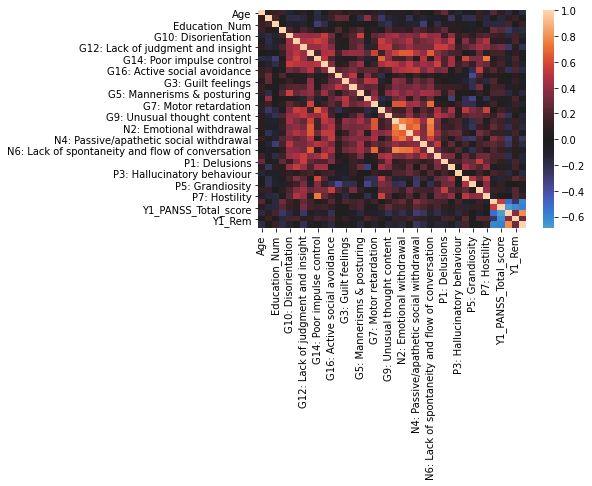

In [ ]:
corr = df_imputed.corr()
sns.heatmap(corr, center=0)

In [ ]:
# getting top correlations in the correlation matrix
c = df_imputed.corr().abs()

s = c.unstack()
so = s.sort_values(ascending = False, kind="quicksort")

so = pd.DataFrame(so)
so.columns = ['correlation']

so[(so.correlation > 0.6)&(so.correlation != 1)]

correlation
M6_Rem                                           Y1_Rem_6                                             0.791695
Y1_Rem_6                                         M6_Rem                                               0.791695
N6: Lack of spontaneity and flow of conversation N1: Blunted affect                                   0.785601
N1: Blunted affect                               N6: Lack of spontaneity and flow of conversation     0.785601
                                                 N2: Emotional withdrawal                             0.766332
N2: Emotional withdrawal                         N1: Blunted affect                                   0.766332
G14: Poor impulse control                        P7: Hostility                                        0.740767
P7: Hostility                                    G14: Poor impulse control                            0.740767
N2: Emotional withdrawal                         N6: Lack of spontaneity and flow of conversation     0.737875
N6: Lack of spontaneity and flow of conversation N2: Emotional withdrawal                             0.737875
N2: Emotional withdrawal                         N4: Passive/apathetic social withdrawal              0.726337
N4: Passive/apathetic social withdrawal          N2: Emotional withdrawal                             0.726337
N3: Poor rapport                                 N6: Lack of spontaneity and flow of conversation     0.717912
N6: Lack of spontaneity and flow of conversation N3: Poor rapport                                     0.717912
N3: Poor rapport                                 N1: Blunted affect                                   0.713321
N1: Blunted affect                               N3: Poor rapport                                     0.713321
G7: Motor retardation                            N6: Lack of spontaneity and flow of conversation     0.699670
N6: Lack of spontaneity and flow of conversation G7: Motor retardation                                0.699670
Y1_PANSS_Total_score                             M6_Rem                                               0.686517
M6_Rem                                           Y1_PANSS_Total_score                                 0.686517
G14: Poor impulse control                        G8: Uncooperativeness                                0.683503
G8: Uncooperativeness                            G14: Poor impulse control                            0.683503
N3: Poor rapport                                 N2: Emotional withdrawal                             0.664899
N2: Emotional withdrawal                         N3: Poor rapport                                     0.664899
G13: Disturbance of volition                     N6: Lack of spontaneity and flow of conversation     0.662850
N6: Lack of spontaneity and flow of conversation G13: Disturbance of volition                         0.662850
N2: Emotional withdrawal                         G13: Disturbance of volition                         0.661495
G13: Disturbance of volition                     N2: Emotional withdrawal                             0.661495
N3: Poor rapport                                 G13: Disturbance of volition                         0.646565
G13: Disturbance of volition                     N3: Poor rapport                                     0.646565
G7: Motor retardation                            N1: Blunted affect                                   0.636770
N1: Blunted affect                               G7: Motor retardation                                0.636770
                                                 N4: Passive/apathetic social withdrawal              0.636346
N4: Passive/apathetic social withdrawal          N1: Blunted affect                                   0.636346
G7: Motor retardation                            N2: Emotional withdrawal                             0.625206
N2: Emotional withdrawal                         G7: Motor retardation                                0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa41bb8f90>,
      dtype=object)

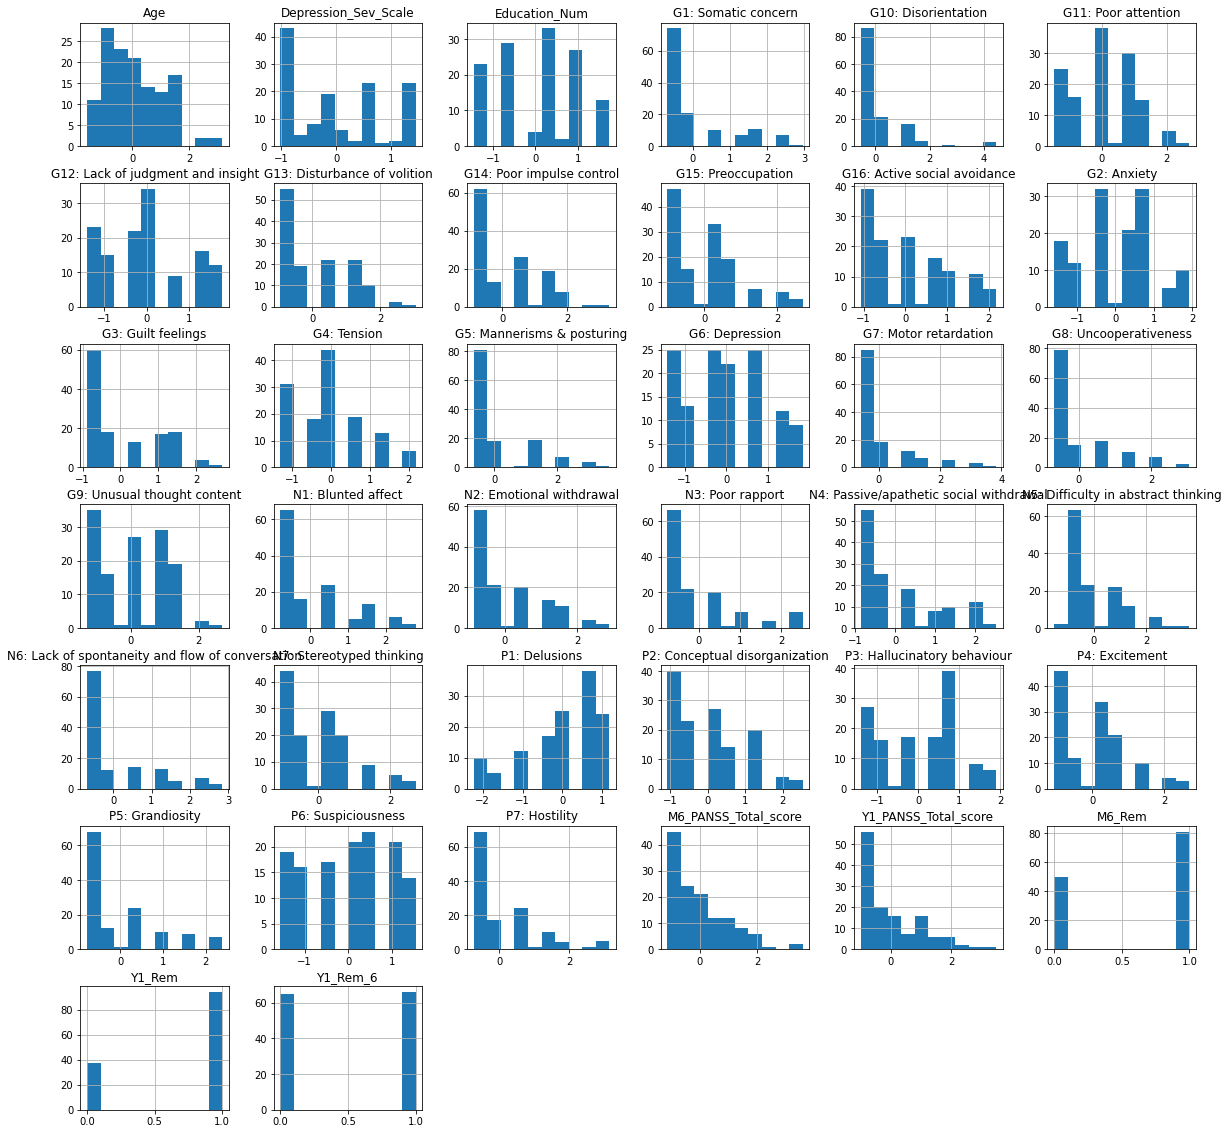

In [ ]:
# get distribution of numerical features
# plot histogram for numerical variables
plt.figure(figsize = (20,20))
ax = plt.gca()
df_imputed.hist(ax = ax)

         Age  count
0  -0.942541     11
1  -0.471270     10
2  -0.628360     10
3  -1.099631      9
4   0.157090      8
5  -0.785450      8
6   1.256721      7
7   0.000000      7
8   0.628360      6
9  -0.157090      6
10 -1.256721      5
11  1.413811      5
12  1.570901      5
13 -1.413811      5
14  0.785450      5
15  0.942541      5
16  0.314180      5
17  1.099631      3
18 -0.314180      3
19  0.471270      3
20  2.984712      1
21  2.356351      1
22  2.199261      1
23 -1.570901      1
24  3.141802      1
    Depression_Sev_Scale  count
0              -1.016301     43
1               1.447213     23
2               0.626042     20
3              -0.195130     16
4              -0.523598      4
5              -0.195130      3
6              -0.687833      3
7               0.461807      2
8              -0.359364      2
9              -0.030896      1
10              0.461807      1
11             -0.030896      1
12             -0.030896      1
13              0.790276      1


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

   N7: Stereotyped thinking  count
0                 -1.036952     44
1                  0.207390     28
2                  0.829561     20
3                 -0.414781     20
4                  1.451732      9
5                  2.073903      5
6                  2.696074      3
7                  0.207390      1
8                  0.082956      1
   P1: Delusions  count
0       0.603365     38
1       0.039350     24
2       1.167381     24
3      -0.524666     16
4      -1.088681     12
5      -2.216712     10
6      -1.652697      5
7      -0.411862      1
8      -0.073453      1
   P2: Conceptual disorganization  count
0                       -1.080279     40
1                        0.121066     26
2                       -0.479607     23
3                        1.322411     20
4                        0.721738     13
5                        1.923084      4
6                        2.523756      3
7                        0.121066      1
8                        0.601604      1


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

   P7: Hostility  count
0      -0.731087     68
1       0.560834     24
2      -0.085127     17
3       1.206794     10
4       3.144675      5
5       1.852754      4
6      -0.472703      1
7       0.819218      1
8       2.498715      1
    M6_PANSS_Total_score  count
0              -1.125512      9
1              -0.908924      8
2              -0.313308      7
3              -0.963071      7
4              -0.854777      5
5              -0.800630      5
6               0.498896      4
7               0.011573      4
8              -0.584043      4
9               0.228161      4
10             -0.096720      3
11             -1.017218      3
12              1.419393      3
13             -0.150867      3
14              0.336455      3
15             -0.259161      3
16             -0.475749      3
17             -0.692337      3
18             -1.071365      3
19              0.823777      2
20              1.202806      2
21              1.148659      2
22              0.282308

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

    Accommodation  count
0  Private_Family     70
1          Rented     51
2   Private_Owner      7
3          Prison      1
4        Homeless      1
5             NFA      1
  Admitted_Hosp  count
0           Not     74
1      Hospital     57
  Alcohol  count
0     Yes    109
1      No     22
  Citizenship  count
0          UK    118
1       Other      6
2      Asylum      4
3     Refugee      3
  Depression_Severity  count
0                None     72
1              Severe     23
2            Moderate     20
3                Mild     16
  Drugs  count
0   Yes     87
1    No     44


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

    Education  count
0    17 to 18     41
1       At 16     28
2     College     26
3   Before 16     23
4  University     13
  Ethnicity  count
0     White    116
1     Other     15
   Gender  count
0    Male     92
1  Female     39
      Household  count
0   Parent_Sibs     79
1         Alone     30
2  Spouse_Child     10
3       Friends      9
4          Sibs      3
  M0_Emp  count
0    Yes     75
1     No     56
  Parent  count
0     No    113
1    Yes     18


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

   Relationship  count
0        Single    113
1  Relationship     11
2     Separated      4
3       Married      2
4      Divorced      1
  M6_Emp  count
0     No     78
1    Yes     53
   M6_Rem  count
0     1.0     81
1     0.0     50
  M6_Res  count
0    Yes     93
1     No     38
  Y1_Emp  count
0     No     80
1    Yes     51
   Y1_Rem  count
0     1.0     94
1     0.0     37


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

  Y1_Res  count
0    Yes     94
1     No     37
   Y1_Rem_6  count
0       1.0     66
1       0.0     65


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


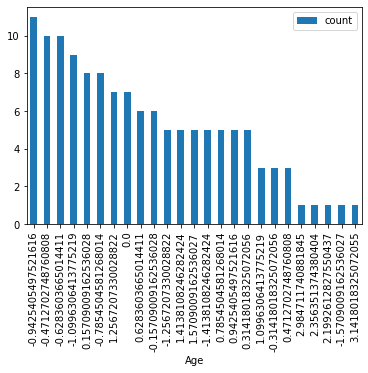

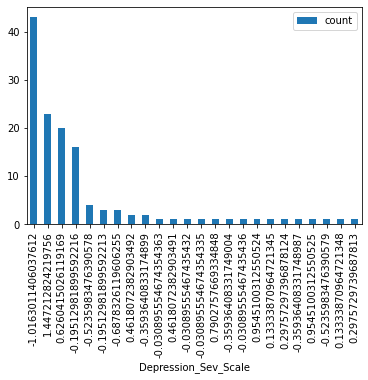

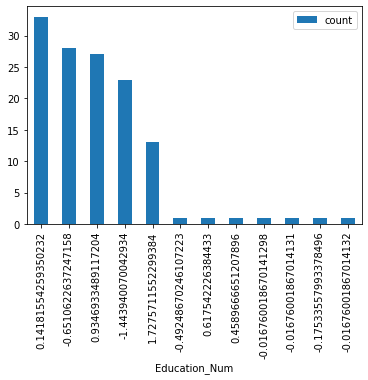

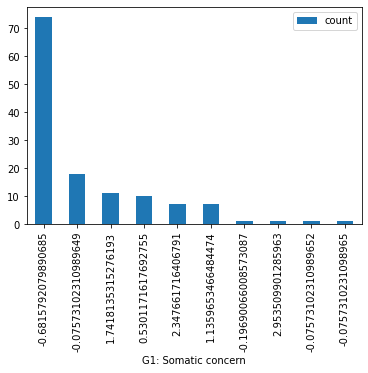

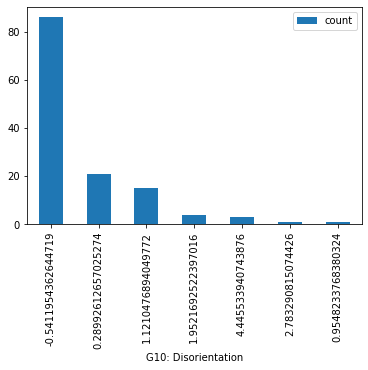

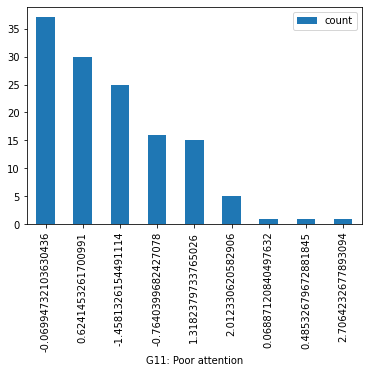

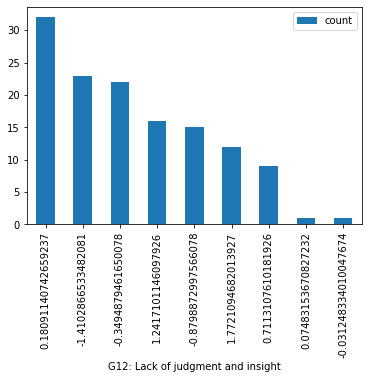

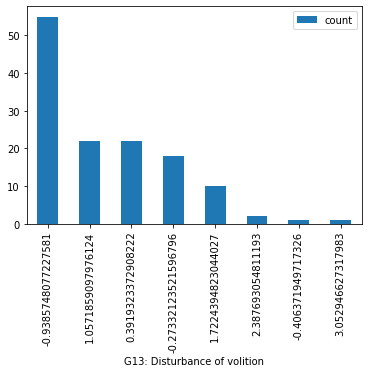

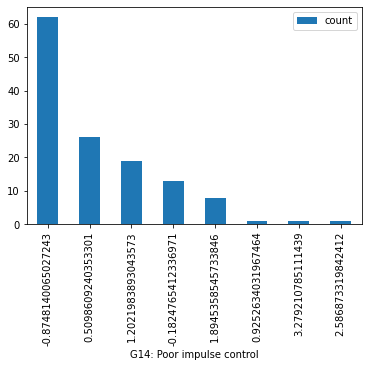

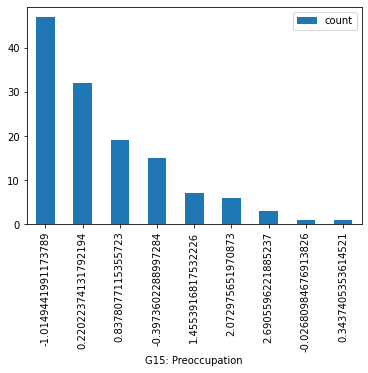

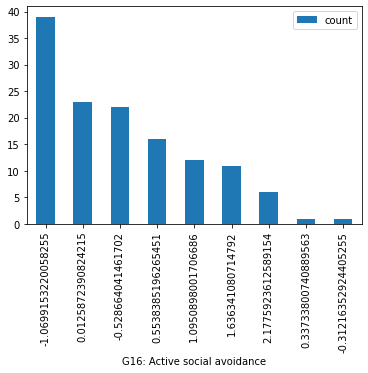

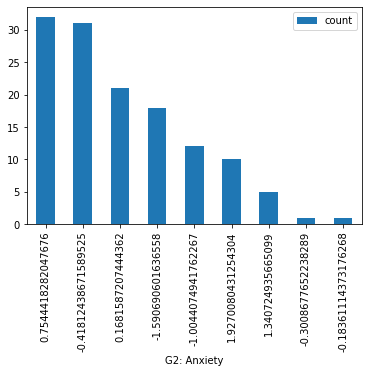

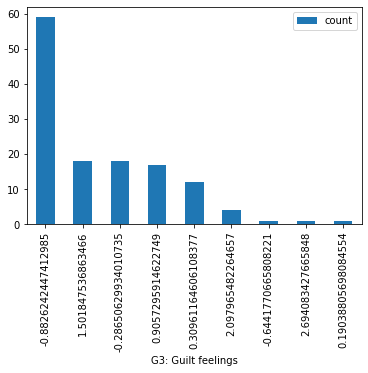

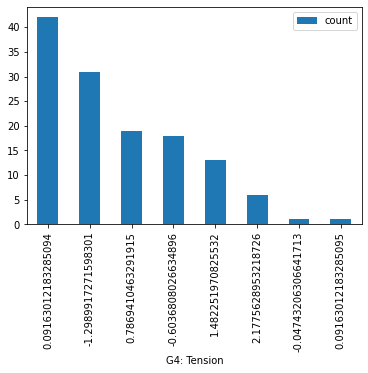

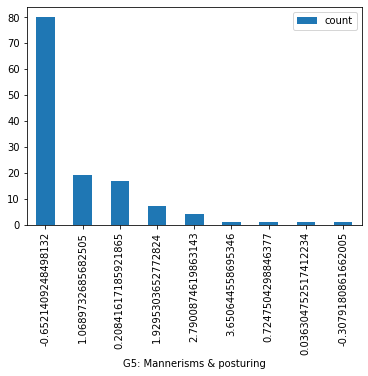

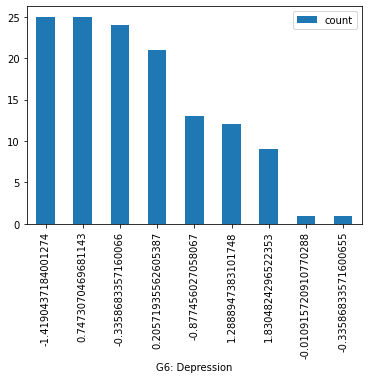

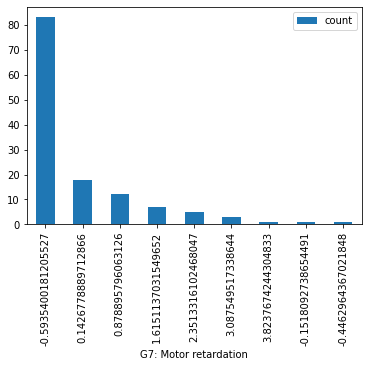

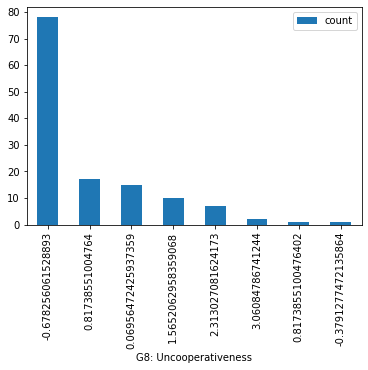

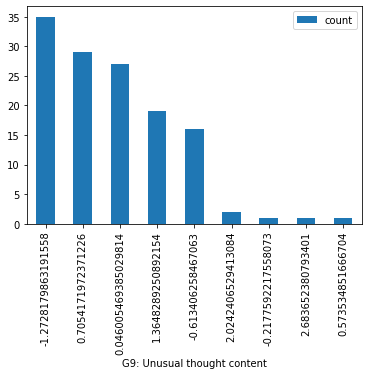

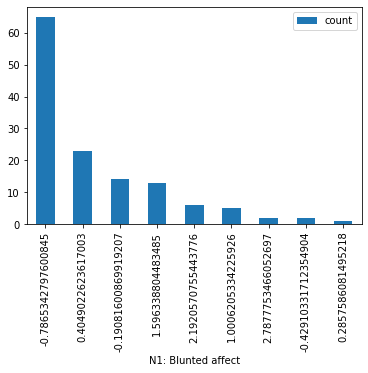

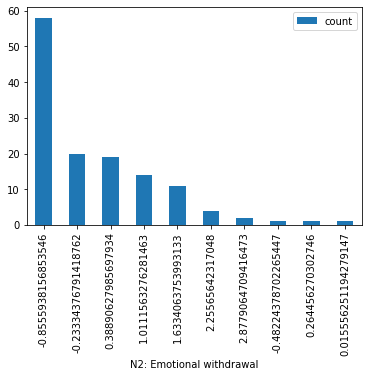

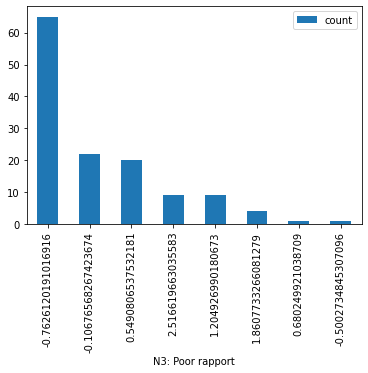

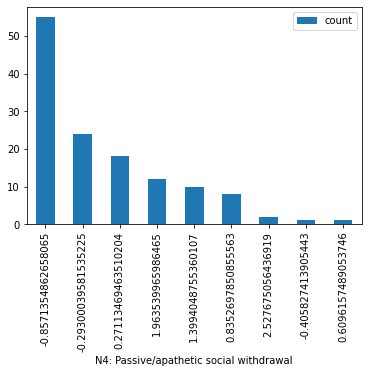

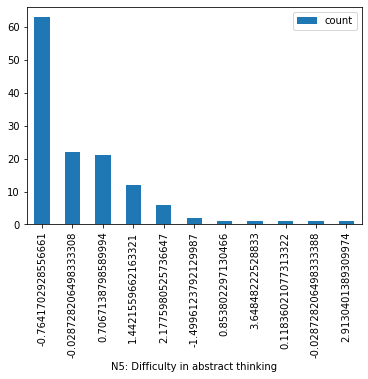

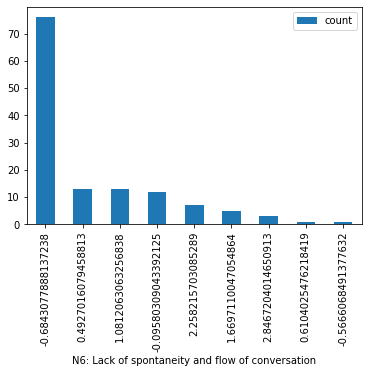

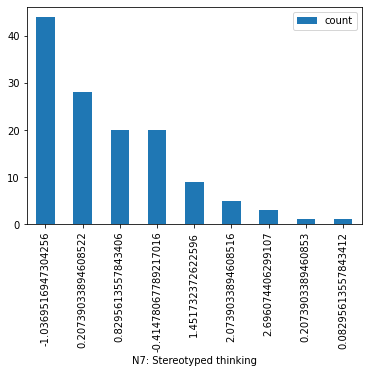

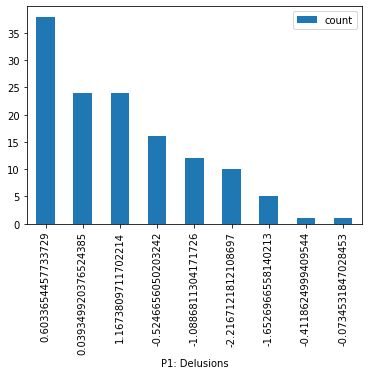

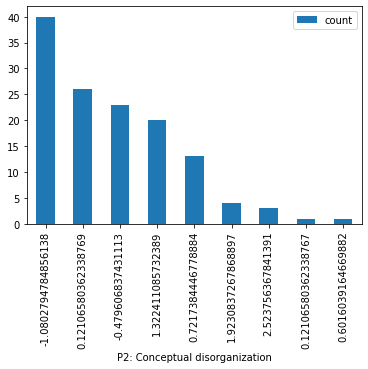

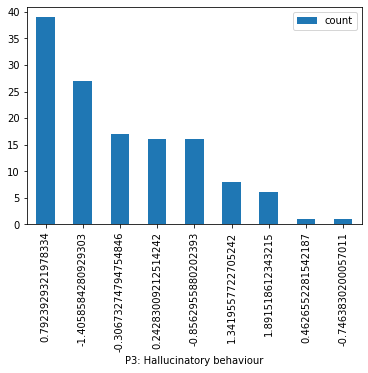

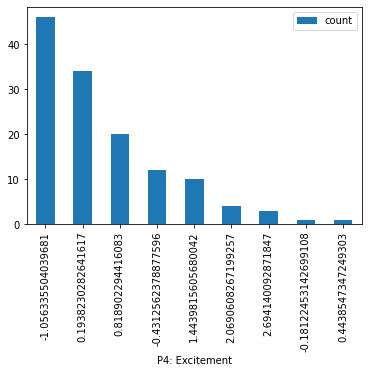

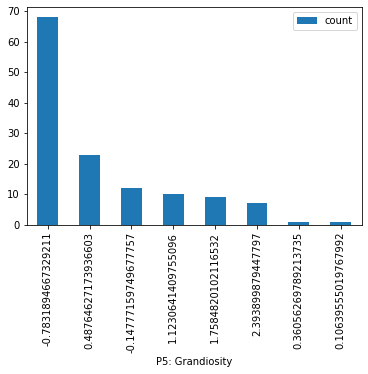

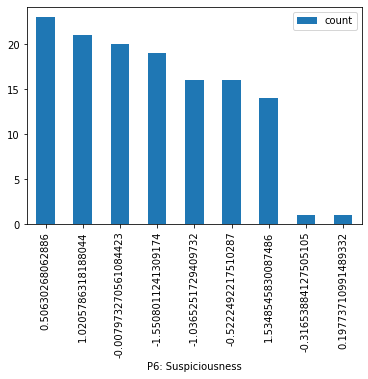

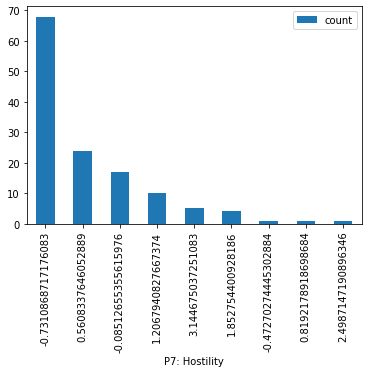

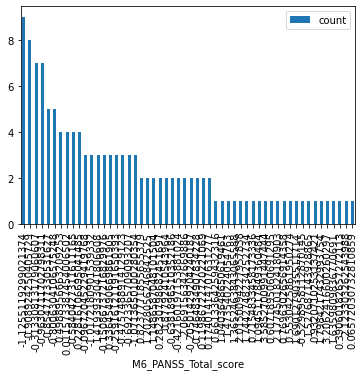

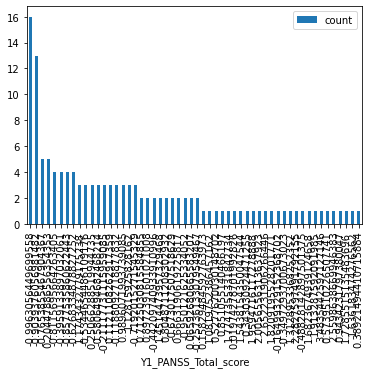

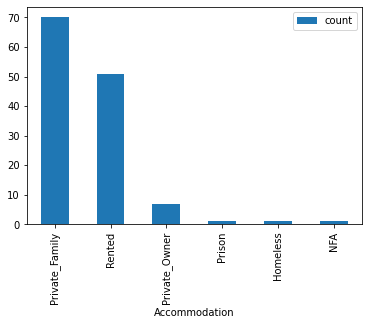

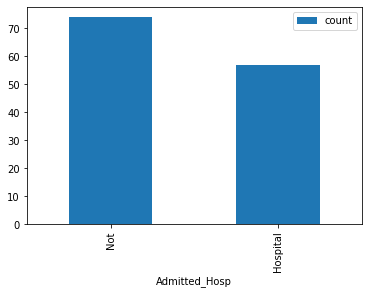

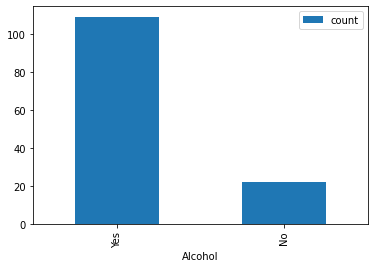

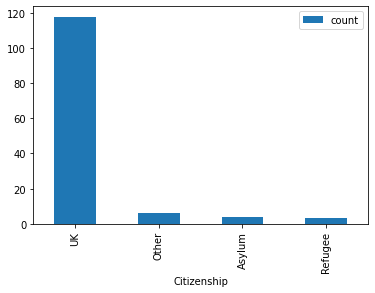

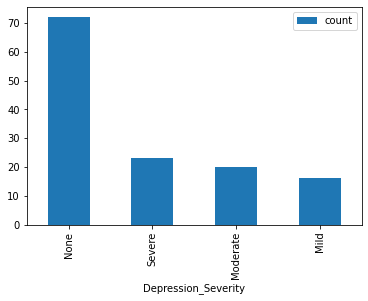

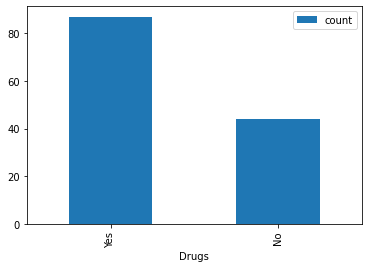

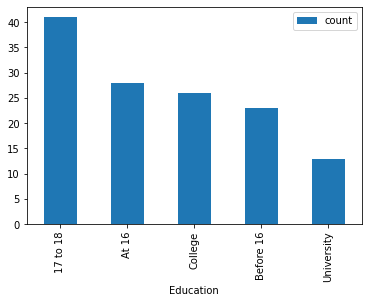

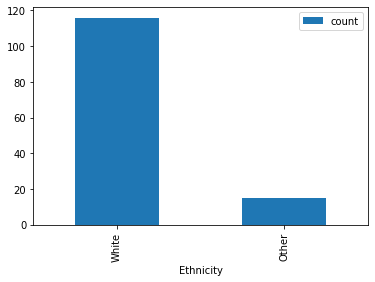

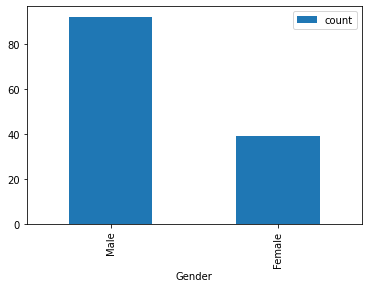

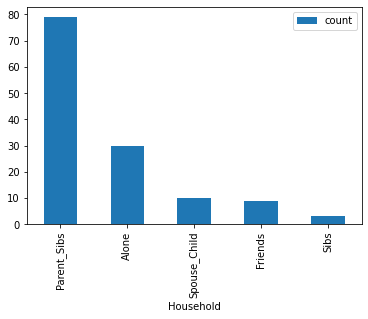

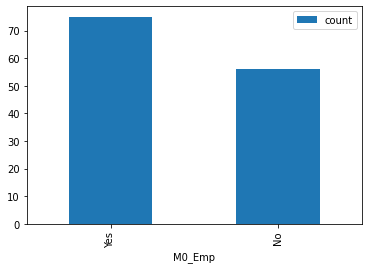

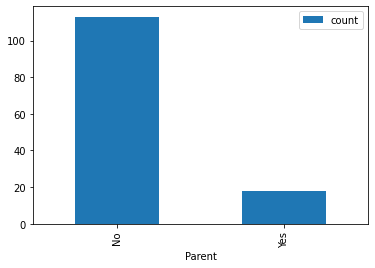

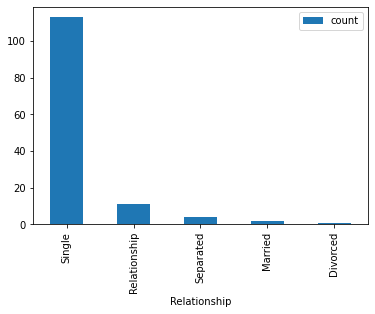

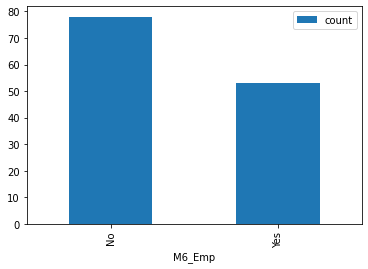

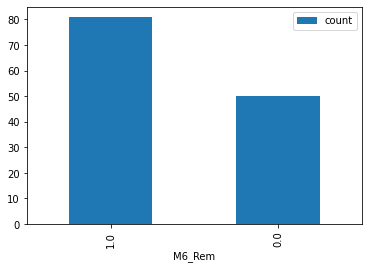

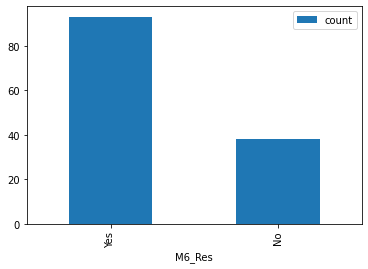

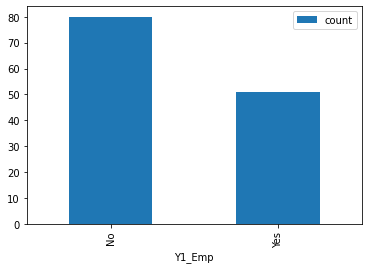

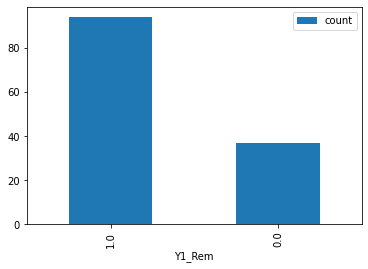

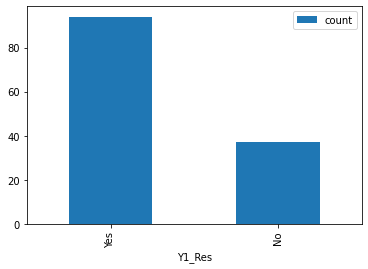

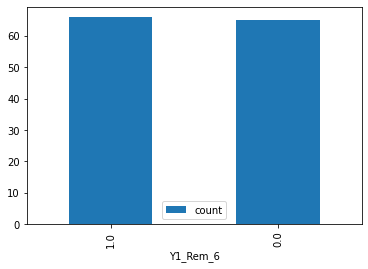

In [ ]:
# plot bar plot dataset
for column in df_imputed.columns:
    a = pd.DataFrame(df_imputed[column].value_counts()).reset_index().rename(columns={"index": column,column:'count'}) 
    print(a)
    a.plot.bar(x = column, y = 'count')

# **Part 4: Feature Selection**

In [ ]:
df_label.head()

,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,M6_Res,Y1_Emp,Y1_Res,label
0,-1.099631,-0.030896,-1.443940,-0.075731,0.289926,0.624145,-0.349488,-0.938575,1.202198,0.220224,-1.069915,-0.418124,0.905730,-1.298992,-0.652141,-0.335868,0.142678,1.565206,-1.272818,0.404902,-0.233344,-0.762612,-0.293000,1.442156,0.492702,0.829561,-2.216712,0.121066,-1.405858,-1.056336,-0.783189,-1.550801,-0.085127,1.365246,0.712503,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Alone,No,No,Single,No,No,No,No,0
1,-1.099631,0.626042,0.141816,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,0.220224,-0.528664,-0.418124,-0.286506,0.091630,-0.652141,0.205719,0.878896,-0.678256,-1.272818,0.404902,-0.855594,-0.106766,-0.293000,-0.028728,-0.684308,-1.036952,-2.216712,-0.479607,0.242830,-1.056336,-0.783189,-1.036525,-0.731087,-0.259161,-0.719202,Private_Family,Not,Yes,UK,Moderate,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,3
2,-1.256721,-1.016301,-1.443940,0.530117,1.121048,0.624145,1.772109,-0.273321,0.509861,-0.397360,-0.528664,-0.418124,0.905730,-0.603681,0.208416,1.288895,-0.593540,2.313027,-0.613406,1.000621,1.011156,0.549081,0.271135,2.177598,1.081206,0.207390,0.603365,0.121066,0.792393,1.443982,1.758482,-0.522249,-0.085127,0.823777,0.527767,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Parent_Sibs,No,No,Single,No,Yes,No,Yes,2
3,-1.099631,1.447213,0.141816,-0.681579,-0.541195,-0.069947,-1.410287,-0.938575,0.509861,-0.397360,-1.069915,-0.418124,0.905730,0.091630,-0.652141,0.747307,1.615114,-0.678256,-1.272818,-0.190816,-0.855594,-0.762612,-0.293000,-0.028728,-0.684308,-1.036952,-1.088681,0.121066,0.242830,1.443982,0.487646,-0.522249,0.560834,-1.125512,-0.765386,Private_Family,Not,Yes,UK,Severe,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,Yes,Yes,Yes,1
4,-1.256721,-0.195130,-0.651062,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.182477,-0.397360,0.012587,-0.418124,0.309612,-1.298992,-0.652141,0.747307,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,0.207390,-1.088681,0.121066,-0.306733,0.193823,-0.783189,-1.036525,-0.731087,-0.259161,-0.996306,Private_Family,Not,Yes,UK,None,Yes,At 16,White,Male,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,1


### 4.1 Get Feature Importance

In [ ]:
# checking label distribution
df_label['label'].value_counts()

1    56
2    26
0    24
3    12
6    10
5     3
Name: label, dtype: int64

In [ ]:
# converting categories from text into numbers only for features importance purpose
cat_v = ['Accommodation','Admitted_Hosp','Alcohol','Citizenship','Depression_Severity','Drugs','Education','Ethnicity',	'Gender',
         'Household','M0_Emp','Parent','Relationship','M6_Emp','Y1_Res','M6_Res','Y1_Emp']
ordinal_encoder = OrdinalEncoder()
df_label_encoded = ordinal_encoder.fit_transform(df_label[cat_v])

In [ ]:
# geting converted dataframe for categorical features
df_label_encoded = pd.DataFrame(df_label_encoded)
df_label_encoded.columns = cat_v

In [ ]:
df_label_encoded

,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,Y1_Res,M6_Res,Y1_Emp
0,3.0,0.0,1.0,3.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1,3.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0
2,3.0,0.0,1.0,3.0,2.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0
3,3.0,1.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0
4,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3.0,1.0,1.0,3.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0
127,5.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0
128,5.0,0.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0
129,5.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
# geting a dataset only for feature importance 
df_imp = df_label.copy()
df_imp[cat_v] = df_label_encoded[cat_v]

In [ ]:
# using RandomizedSerchCV to get the best parameters of random forest tree model
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(0, 30, 3), "min_samples_split": range(0, 15, 3),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5], "max_features": range(20,40),
              "n_estimators": [200,250,300, 350, 400,450,500]}
forest_clf = RandomForestClassifier()
random_search = RandomizedSearchCV(forest_clf, parameters,cv = 3,scoring = 'roc_auc_ovr_weighted',n_jobs = 4, return_train_score = True, n_iter= 200,random_state = 10)
random_search.fit(df_imp.drop(['label'],axis = 1),df_imp['label'])

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
forest_model = RandomForestClassifier(n_estimators = 350, max_depth = 6, min_samples_split = 12, min_samples_leaf = 3,
                                      max_samples = 0.5, max_features=24, random_state = 66).fit(df_imp.drop(['label'],axis = 1),df_imp['label'])

In [ ]:
# create feature importances data frame
importance = pd.DataFrame()
importance["var"] = df_imp.drop(['label'],axis = 1).columns
importance["imp"] = forest_model.feature_importances_
importance = importance.sort_values("imp", ascending = False).reset_index(drop = True)

importance

,var,imp
0,Y1_Res,0.299723
1,Y1_PANSS_Total_score,0.271268
2,M6_PANSS_Total_score,0.134837
3,M6_Res,0.021711
4,G16: Active social avoidance,0.016093
5,N5: Difficulty in abstract thinking,0.013726
6,G12: Lack of judgment and insight,0.011908
7,P4: Excitement,0.011843
8,G1: Somatic concern,0.011820
9,Age,0.011793


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


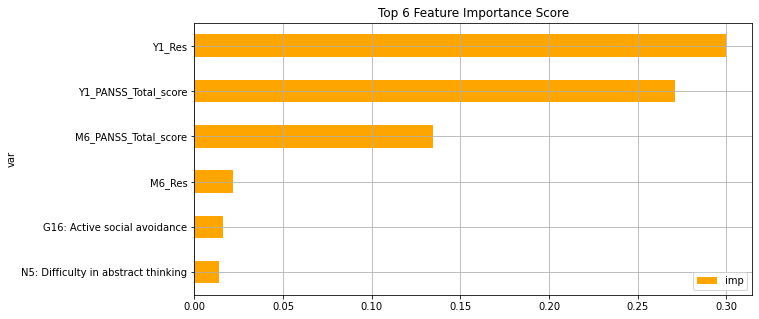

In [ ]:
# get top 6 features
k = importance[importance.imp >= 0.012]
k.sort_values('imp',ascending = True,inplace = True)
k.plot.barh(x = 'var',figsize=(10,5), color = 'orange', grid=True, legend= True, title ='Top 6 Feature Importance Score')

In [ ]:
#pca_model.explained_variance_ratio_

In [ ]:
#var_explained = np.cumsum(pca_model.explained_variance_ratio_)
#var_explained

In [ ]:
#np.where(var_explained >= .95)

# **Part 5: Building Models**

### 5.1 Logistic Regression Model

In [ ]:
#re-assiging df_label to df_label_ar for tracking purposes
df_label_ar = df_label.copy()
df_label_ar.head()

,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,M6_Res,Y1_Emp,Y1_Res,label
0,-1.099631,-0.030896,-1.443940,-0.075731,0.289926,0.624145,-0.349488,-0.938575,1.202198,0.220224,-1.069915,-0.418124,0.905730,-1.298992,-0.652141,-0.335868,0.142678,1.565206,-1.272818,0.404902,-0.233344,-0.762612,-0.293000,1.442156,0.492702,0.829561,-2.216712,0.121066,-1.405858,-1.056336,-0.783189,-1.550801,-0.085127,1.365246,0.712503,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Alone,No,No,Single,No,No,No,No,0
1,-1.099631,0.626042,0.141816,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,0.220224,-0.528664,-0.418124,-0.286506,0.091630,-0.652141,0.205719,0.878896,-0.678256,-1.272818,0.404902,-0.855594,-0.106766,-0.293000,-0.028728,-0.684308,-1.036952,-2.216712,-0.479607,0.242830,-1.056336,-0.783189,-1.036525,-0.731087,-0.259161,-0.719202,Private_Family,Not,Yes,UK,Moderate,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,3
2,-1.256721,-1.016301,-1.443940,0.530117,1.121048,0.624145,1.772109,-0.273321,0.509861,-0.397360,-0.528664,-0.418124,0.905730,-0.603681,0.208416,1.288895,-0.593540,2.313027,-0.613406,1.000621,1.011156,0.549081,0.271135,2.177598,1.081206,0.207390,0.603365,0.121066,0.792393,1.443982,1.758482,-0.522249,-0.085127,0.823777,0.527767,Private_Family,Hospital,Yes,UK,None,Yes,Before 16,White,Female,Parent_Sibs,No,No,Single,No,Yes,No,Yes,2
3,-1.099631,1.447213,0.141816,-0.681579,-0.541195,-0.069947,-1.410287,-0.938575,0.509861,-0.397360,-1.069915,-0.418124,0.905730,0.091630,-0.652141,0.747307,1.615114,-0.678256,-1.272818,-0.190816,-0.855594,-0.762612,-0.293000,-0.028728,-0.684308,-1.036952,-1.088681,0.121066,0.242830,1.443982,0.487646,-0.522249,0.560834,-1.125512,-0.765386,Private_Family,Not,Yes,UK,Severe,Yes,17 to 18,White,Female,Parent_Sibs,Yes,No,Single,Yes,Yes,Yes,Yes,1
4,-1.256721,-0.195130,-0.651062,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.182477,-0.397360,0.012587,-0.418124,0.309612,-1.298992,-0.652141,0.747307,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,0.207390,-1.088681,0.121066,-0.306733,0.193823,-0.783189,-1.036525,-0.731087,-0.259161,-0.996306,Private_Family,Not,Yes,UK,None,Yes,At 16,White,Male,Parent_Sibs,Yes,No,Single,Yes,No,Yes,Yes,1


In [ ]:
#Replacing categories with numbers
cleanup_nums = {"Accommodation": {"Private_Family": 1, "Rented": 2, "Private_Owner": 3, "Prison": 4, "Homeless": 5, "NFA": 6}, 
               "Admitted_Hosp": {"Hospital": 1, "Not": 2}, 
               "Citizenship": {"UK": 1, "Other": 2, "Asylum": 3, "Refugee": 4}, 
               "Depression_Severity": {"None": 0, "Severe": 1, "Moderate": 2, "Mild": 3}, 
               "Drugs": {"Yes": 1, "No": 0},
               "Education": {"Before 16": 1, "At 16": 2, "17 to 18": 3, "College": 4, "University": 5},
               "Ethnicity": {"White": 1, "Other": 0},
               "Household": {"Parent_Sibs": 1, "Alone": 2, "Spouse_Child": 3, "Friends": 4, "Sibs": 5}, 
               "Relationship": {"Single": 1, "Relationship": 2, "Separated": 3, "Married": 4, "Divorced": 5}}
               

In [ ]:
df_label_ar = df_label_ar.replace(cleanup_nums)

In [ ]:
# Splitting dataset into train / validation
train_data, val_data = train_test_split(df_label_ar, test_size = 0.3, random_state = 123) 

In [ ]:
X_train = train_data.drop(['label'],axis = 1)
y_train = train_data.label

X_val = val_data.drop(['label'],axis = 1)
y_val = val_data.label

In [ ]:
# Here, we loop through each categorical variable, encode each one at a time.  Then, combine the encoded
# variable back to our dataset, and then drop the original non-encoded variable.
for variable in ["Alcohol", "Drugs", "Gender", "M0_Emp", "Parent", "M6_Emp", "M6_Res", "Y1_Emp", "Y1_Res"]:
    
    # encode each categorical variable in the loop
    df = pd.get_dummies(X_train[variable], prefix = variable, drop_first = True)
    
    # combine the insurance dataset with the encoded categorical variable
    X_train = pd.concat([X_train, df], axis = 1)
    
    # drop the original non-encoded categorical variable from the dataset
    del X_train[variable]
    

In [ ]:
# Here, we loop through each categorical variable, encode each one at a time.  Then, combine the encoded
# variable back to our dataset, and then drop the original non-encoded variable.
for variable in ["Alcohol", "Drugs", "Gender", "M0_Emp", "Parent", "M6_Emp", "M6_Res", "Y1_Emp", "Y1_Res"]:
    
    # encode each categorical variable in the loop
    df = pd.get_dummies(X_val[variable], prefix = variable, drop_first = True)
    
    # combine the insurance dataset with the encoded categorical variable
    X_val = pd.concat([X_val, df], axis = 1)
    
    # drop the original non-encoded categorical variable from the dataset
    del X_val[variable]
    

In [ ]:
# standardize the training and validation sets
for field in X_train.columns:
    standard_dev = X_train[field].std()
    mean = X_train[field].mean()
    
    X_train[field] = (X_train[field] - mean) / standard_dev
    X_val[field] = (X_val[field] - mean) / standard_dev
    

In [ ]:
#fitting the Logistical model
logit_model = LogisticRegressionCV(cv = 10, multi_class = "ovr", solver = "saga", penalty = "l1", random_state = 0).fit(X_train, train_data.label)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conv

In [ ]:
#map each variable to its coefficient
{var : coef for var, coef in zip(X_train.columns, logit_model.coef_[0])}

{'Accommodation': 0.0,
 'Admitted_Hosp': 0.0,
 'Age': 0.0,
 'Alcohol_Yes': 0.0,
 'Citizenship': 0.0,
 'Depression_Sev_Scale': 0.0,
 'Depression_Severity': 0.0,
 'Drugs_1': 0.0,
 'Education': 0.0,
 'Education_Num': 0.0,
 'Ethnicity': 0.0,
 'G10: Disorientation': 0.0,
 'G11: Poor attention': 0.0,
 'G12: Lack of judgment and insight': 0.0,
 'G13: Disturbance of volition': 0.0,
 'G14: Poor impulse control': 0.0,
 'G15: Preoccupation': 0.0,
 'G16: Active social avoidance': 0.0,
 'G1: Somatic concern': 0.0,
 'G2: Anxiety': 0.0,
 'G3: Guilt feelings': 0.0,
 'G4: Tension': 0.0,
 'G5: Mannerisms & posturing': 0.0,
 'G6: Depression': 0.0,
 'G7: Motor retardation': 0.0,
 'G8: Uncooperativeness': 0.0,
 'G9: Unusual thought content': 0.0,
 'Gender_Male': 0.0,
 'Household': 0.0,
 'M0_Emp_Yes': 0.0,
 'M6_Emp_Yes': 0.0,
 'M6_PANSS_Total_score': 0.1612479784625706,
 'M6_Res_Yes': -0.3164571381002097,
 'N1: Blunted affect': 0.0,
 'N2: Emotional withdrawal': 0.0,
 'N3: Poor rapport': 0.0,
 'N4: Passive/a

In [ ]:
# get predicted probabilities
logit_model.predict_proba(X_train)

array([[4.62470331e-03, 5.77615981e-01, 3.39699391e-02, 1.34870666e-01,
        1.15222543e-01, 1.33696168e-01],
       [5.34904059e-01, 4.89389746e-08, 1.97798704e-02, 1.56492264e-01,
        1.33694280e-01, 1.55129478e-01],
       [5.60440107e-01, 3.48505777e-05, 1.65902991e-02, 1.48627069e-01,
        1.26974897e-01, 1.47332777e-01],
       [3.89356826e-03, 5.73875034e-01, 4.51718560e-02, 1.32505677e-01,
        1.13202089e-01, 1.31351775e-01],
       [1.61849741e-02, 1.22169780e-02, 3.18770511e-01, 2.29415637e-01,
        1.95994088e-01, 2.27417812e-01],
       [2.58069840e-02, 2.05961528e-03, 5.13604020e-01, 1.61135682e-01,
        1.37661239e-01, 1.59732460e-01],
       [5.22853619e-01, 2.63168916e-09, 4.14433814e-02, 1.53114069e-01,
        1.30808225e-01, 1.51780702e-01],
       [4.59436310e-01, 2.78976599e-02, 9.95998599e-03, 1.76660176e-01,
        1.50924106e-01, 1.75121762e-01],
       [3.59769419e-03, 5.58644213e-01, 7.18564490e-02, 1.28584586e-01,
        1.09852227e-01, 

In [ ]:
# Using .predict() assumes a probability threshold of 50%.  
y_train_pred = logit_model.predict(X_train)
y_train_pred

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 3, 2, 2, 2, 2, 0, 1, 0, 3, 1, 2, 3,
       1, 1, 0, 0, 3, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 3, 0, 0, 0, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 3, 1, 0, 0, 1, 2, 1, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 2, 0,
       1, 0, 1])

In [ ]:
# predictions on validation set
y_val_pred = logit_model.predict(X_val)
y_val_pred

array([3, 2, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# get predicted probabilities for the training and validation sets
y_train_prob = logit_model.predict_proba(X_train)
y_val_prob = logit_model.predict_proba(X_val)

In [ ]:
# evaluation report for training dataset
report_t1 = classification_report(y_true = y_train, y_pred = logit_model.predict(X_train))
print(report_t1)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      1.00      1.00        35
           2       0.89      0.89      0.89        19
           3       0.78      0.78      0.78         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         7

    accuracy                           0.87        91
   macro avg       0.56      0.61      0.58        91
weighted avg       0.81      0.87      0.83        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# evaluation report for validation dataset
report_v1 = classification_report(y_true = y_val, y_pred = logit_model.predict(X_val))
print(report_v1)

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       0.70      0.76      0.73        21
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.27      0.37      0.30        40
weighted avg       0.50      0.57      0.52        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# AUC for training dataset and validation dataset
auc_train1 = []
auc_val1 = []
for index in [0,1,2,3,4]:
    
    if index == 4:
        pos_label = 6
    else:
        pos_label = index
        
    # auc for training dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_train,y_train_prob[:,index],pos_label = pos_label)
    auc_t1 = metrics.auc(fpr,tpr)
    auc_train1.append(auc_t1)
    
    # auc for validation dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_val,y_val_prob[:,index], pos_label = pos_label)
    auc_v1 = metrics.auc(fpr,tpr)
    auc_val1.append(auc_v1)

In [ ]:
# get AUC dataframe
auc1 = pd.DataFrame()
auc1['Class'] = ['class 0','class 1','class 2','calss 3','class 6']
auc1['AUC_train'] = auc_train1
auc1['AUC_val'] = auc_val1
auc1

,Class,AUC_train,AUC_val
0,class 0,0.990141,0.944444
1,class 1,1.000000,0.749373
2,class 2,0.991959,0.844156
3,calss 3,0.987805,0.288288
4,class 6,0.778912,0.918919


In [ ]:
auc_logistic = auc1.copy()

In [ ]:
# get weight average AUC and regular AUC
weight_auc_t1 = auc_train1[0]*(19/89) + auc_train1[1]*(34/89) + auc_train1[2]*(20/89) + auc_train1[3]*(10/89) + auc_train1[4]*(6/89)
average_auc_t1 = auc1['AUC_train'].mean()

weight_auc_v1 = auc_val1[0]*(5/39) + auc_val1[1]*(22/39) + auc_val1[2]*(6/39) + auc_val1[3]*(2/39) + auc_val1[4]*(4/39)
average_auc_v1 = auc1['AUC_val'].mean()

summary = pd.DataFrame([[weight_auc_t1,average_auc_t1],[weight_auc_v1,average_auc_v1]],columns = ['weighted average AUC','average AUC'],index = ['train','validation'])
summary

,weighted average AUC,average AUC
train,0.979813,0.949763
validation,0.782708,0.749036


In [ ]:
auc_logistic_weighted = summary.copy()

In [ ]:
df_label_ar_fe = df_label_ar.copy()
df_label_ar_fe

,Age,Depression_Sev_Scale,Education_Num,G1: Somatic concern,G10: Disorientation,G11: Poor attention,G12: Lack of judgment and insight,G13: Disturbance of volition,G14: Poor impulse control,G15: Preoccupation,G16: Active social avoidance,G2: Anxiety,G3: Guilt feelings,G4: Tension,G5: Mannerisms & posturing,G6: Depression,G7: Motor retardation,G8: Uncooperativeness,G9: Unusual thought content,N1: Blunted affect,N2: Emotional withdrawal,N3: Poor rapport,N4: Passive/apathetic social withdrawal,N5: Difficulty in abstract thinking,N6: Lack of spontaneity and flow of conversation,N7: Stereotyped thinking,P1: Delusions,P2: Conceptual disorganization,P3: Hallucinatory behaviour,P4: Excitement,P5: Grandiosity,P6: Suspiciousness,P7: Hostility,M6_PANSS_Total_score,Y1_PANSS_Total_score,Accommodation,Admitted_Hosp,Alcohol,Citizenship,Depression_Severity,Drugs,Education,Ethnicity,Gender,Household,M0_Emp,Parent,Relationship,M6_Emp,M6_Res,Y1_Emp,Y1_Res,label
0,-1.099631,-0.030896,-1.443940,-0.075731,0.289926,0.624145,-0.349488,-0.938575,1.202198,0.220224,-1.069915,-0.418124,0.905730,-1.298992,-0.652141,-0.335868,0.142678,1.565206,-1.272818,0.404902,-0.233344,-0.762612,-0.293000,1.442156,0.492702,0.829561,-2.216712,0.121066,-1.405858,-1.056336,-0.783189,-1.550801,-0.085127,1.365246,0.712503,1,1,Yes,1,0,1,1,1,Female,2,No,No,1,No,No,No,No,0
1,-1.099631,0.626042,0.141816,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.874814,0.220224,-0.528664,-0.418124,-0.286506,0.091630,-0.652141,0.205719,0.878896,-0.678256,-1.272818,0.404902,-0.855594,-0.106766,-0.293000,-0.028728,-0.684308,-1.036952,-2.216712,-0.479607,0.242830,-1.056336,-0.783189,-1.036525,-0.731087,-0.259161,-0.719202,1,2,Yes,1,2,1,3,1,Female,1,Yes,No,1,Yes,No,Yes,Yes,3
2,-1.256721,-1.016301,-1.443940,0.530117,1.121048,0.624145,1.772109,-0.273321,0.509861,-0.397360,-0.528664,-0.418124,0.905730,-0.603681,0.208416,1.288895,-0.593540,2.313027,-0.613406,1.000621,1.011156,0.549081,0.271135,2.177598,1.081206,0.207390,0.603365,0.121066,0.792393,1.443982,1.758482,-0.522249,-0.085127,0.823777,0.527767,1,1,Yes,1,0,1,1,1,Female,1,No,No,1,No,Yes,No,Yes,2
3,-1.099631,1.447213,0.141816,-0.681579,-0.541195,-0.069947,-1.410287,-0.938575,0.509861,-0.397360,-1.069915,-0.418124,0.905730,0.091630,-0.652141,0.747307,1.615114,-0.678256,-1.272818,-0.190816,-0.855594,-0.762612,-0.293000,-0.028728,-0.684308,-1.036952,-1.088681,0.121066,0.242830,1.443982,0.487646,-0.522249,0.560834,-1.125512,-0.765386,1,2,Yes,1,1,1,3,1,Female,1,Yes,No,1,Yes,Yes,Yes,Yes,1
4,-1.256721,-0.195130,-0.651062,-0.681579,-0.541195,-1.458133,-1.410287,-0.938575,-0.182477,-0.397360,0.012587,-0.418124,0.309612,-1.298992,-0.652141,0.747307,-0.593540,-0.678256,-1.272818,-0.786534,-0.855594,-0.762612,-0.857135,-0.764170,-0.684308,0.207390,-1.088681,0.121066,-0.306733,0.193823,-0.783189,-1.036525,-0.731087,-0.259161,-0.996306,1,2,Yes,1,0,1,2,1,Male,1,Yes,No,1,Yes,No,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.157090,1.447213,0.141816,-0.075731,0.289926,-0.764040,-1.410287,0.391932,-0.874814,0.837808,0.553839,0.754442,1.501848,0.091630,-0.652141,0.747307,0.878896,-0.678256,0.705417,1.000621,0.388906,-0.106766,0.271135,-0.764170,0.492702,-1.036952,0.039350,0.121066,-0.306733,-1.056336,-0.783189,0.506303,-0.731087,0.336455,1.728552,1,2,Yes,1,1,1,3,1,Male,1,Yes,No,1,No,Yes,No,No,0
127,-0.628360,-1.016301,0.141816,-0.075731,1.121048,0.624145,-0.349488,0.391932,1.202198,0.837808,0.553839,-0.418124,0.905730,-0.603681,0.208416,0.747307,0.142678,0.817386,0.705417,1.596339,1.633406,1.204927,0.835270,-0.028728,-0.095803,-0.414781,-0.524666,-0.479607,0.792393,-0.431256,-0.147772,1.020579,-0.085127,-0.475749,1.081975,2,2,Yes,1,0,1,3,1,Male,4,Yes,No,1,Yes,Yes,Yes,Yes,1
128,-0.628360,-0.359364,-1.443940,-0.681579,1.121048,0.624145,1.241710,-0.938575,1.894536,0.837808,0.55383

In [ ]:
#Feature Engineering
# Based on the histogram, these features are right skewed, so by taking the square root of them, the model should perform better.
df_label_ar_fe["G14: Poor impulse control"] = np.cbrt(df_label_ar_fe['G14: Poor impulse control'])
df_label_ar_fe["G13: Disturbance of volition"] = np.cbrt(df_label_ar_fe['G13: Disturbance of volition'])
df_label_ar_fe["G15: Preoccupation"] = np.cbrt(df_label_ar_fe['G15: Preoccupation'])
df_label_ar_fe["G16: Active social avoidance"] = np.cbrt(df_label_ar_fe['G16: Active social avoidance'])
df_label_ar_fe["G3: Guilt feelings"] = np.cbrt(df_label_ar_fe['G3: Guilt feelings'])
df_label_ar_fe["G5: Mannerisms & posturing"] = np.cbrt(df_label_ar_fe['G5: Mannerisms & posturing'])
df_label_ar_fe["G8: Uncooperativeness"] = np.cbrt(df_label_ar_fe['G8: Uncooperativeness'])
df_label_ar_fe["N1: Blunted affect"] = np.cbrt(df_label_ar_fe['N1: Blunted affect'])
df_label_ar_fe["N2: Emotional withdrawal"] = np.cbrt(df_label_ar_fe['N2: Emotional withdrawal'])
df_label_ar_fe["N3: Poor rapport"] = np.cbrt(df_label_ar_fe['N3: Poor rapport'])
df_label_ar_fe["N4: Passive/apathetic social withdrawal"] = np.cbrt(df_label_ar_fe['N4: Passive/apathetic social withdrawal'])
df_label_ar_fe["N5: Difficulty in abstract thinking"] = np.cbrt(df_label_ar_fe['N5: Difficulty in abstract thinking'])
df_label_ar_fe["N6: Lack of spontaneity and flow of conversation"] = np.cbrt(df_label_ar_fe['N6: Lack of spontaneity and flow of conversation'])
df_label_ar_fe["N7: Stereotyped thinking"] = np.cbrt(df_label_ar_fe['N7: Stereotyped thinking'])
df_label_ar_fe["P2: Conceptual disorganization"] = np.cbrt(df_label_ar_fe['P2: Conceptual disorganization'])
df_label_ar_fe["P4: Excitement"] = np.cbrt(df_label_ar_fe['P4: Excitement'])
df_label_ar_fe["P7: Hostility"] = np.cbrt(df_label_ar_fe['P7: Hostility'])

In [ ]:
train_data, val_data = train_test_split(df_label_ar_fe, test_size = 0.3, random_state = 123) 

In [ ]:
X_train = train_data.drop(['label'],axis = 1)
y_train = train_data.label

X_val = val_data.drop(['label'],axis = 1)
y_val = val_data.label

In [ ]:
# Here, we loop through each categorical variable, encode each one at a time.  Then, combine the encoded
# variable back to our dataset, and then drop the original non-encoded variable.
for variable in ["Alcohol", "Drugs", "Gender", "M0_Emp", "Parent", "M6_Emp", "M6_Res", "Y1_Emp", "Y1_Res"]:
    
    # encode each categorical variable in the loop
    df = pd.get_dummies(X_train[variable], prefix = variable, drop_first = True)
    
    # combine the insurance dataset with the encoded categorical variable
    X_train = pd.concat([X_train, df], axis = 1)
    
    # drop the original non-encoded categorical variable from the dataset
    del X_train[variable]

In [ ]:

# Here, we loop through each categorical variable, encode each one at a time.  Then, combine the encoded
# variable back to our dataset, and then drop the original non-encoded variable.
for variable in ["Alcohol", "Drugs", "Gender", "M0_Emp", "Parent", "M6_Emp", "M6_Res", "Y1_Emp", "Y1_Res"]:
    
    # encode each categorical variable in the loop
    df = pd.get_dummies(X_val[variable], prefix = variable, drop_first = True)
    
    # combine the insurance dataset with the encoded categorical variable
    X_val = pd.concat([X_val, df], axis = 1)
    
    # drop the original non-encoded categorical variable from the dataset
    del X_val[variable]

In [ ]:
# standardize the training and validation sets
for field in X_train.columns:
    standard_dev = X_train[field].std()
    mean = X_train[field].mean()
    
    X_train[field] = (X_train[field] - mean) / standard_dev
    X_val[field] = (X_val[field] - mean) / standard_dev
    

In [ ]:
#fitting the Logistical model
logit_model = LogisticRegressionCV(cv = 10, multi_class = "ovr", penalty = "l1", solver = "saga",random_state = 0).fit(X_train, train_data.label)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conv

In [ ]:
#map each variable to its coefficient
{var : coef for var, coef in zip(X_train.columns, logit_model.coef_[0])}


{'Accommodation': 0.0,
 'Admitted_Hosp': 0.0,
 'Age': 0.0,
 'Alcohol_Yes': 0.0,
 'Citizenship': 0.0,
 'Depression_Sev_Scale': 0.0,
 'Depression_Severity': 0.0,
 'Drugs_1': 0.0,
 'Education': 0.0,
 'Education_Num': 0.0,
 'Ethnicity': 0.0,
 'G10: Disorientation': 0.0,
 'G11: Poor attention': 0.0,
 'G12: Lack of judgment and insight': 0.0,
 'G13: Disturbance of volition': 0.0,
 'G14: Poor impulse control': 0.0,
 'G15: Preoccupation': 0.0,
 'G16: Active social avoidance': 0.0,
 'G1: Somatic concern': 0.0,
 'G2: Anxiety': 0.0,
 'G3: Guilt feelings': 0.0,
 'G4: Tension': 0.0,
 'G5: Mannerisms & posturing': 0.0,
 'G6: Depression': 0.0,
 'G7: Motor retardation': 0.0,
 'G8: Uncooperativeness': 0.0,
 'G9: Unusual thought content': 0.0,
 'Gender_Male': 0.0,
 'Household': 0.0,
 'M0_Emp_Yes': 0.0,
 'M6_Emp_Yes': 0.0,
 'M6_PANSS_Total_score': 0.1444989922547391,
 'M6_Res_Yes': -0.32685080391390986,
 'N1: Blunted affect': 0.0,
 'N2: Emotional withdrawal': 0.0,
 'N3: Poor rapport': 0.0,
 'N4: Passive/

In [ ]:
# get predicted probabilities
logit_model.predict_proba(X_train)


array([[4.84743108e-03, 5.95750382e-01, 3.15615012e-02, 1.30257567e-01,
        1.08475193e-01, 1.29107925e-01],
       [5.62271849e-01, 1.97326536e-07, 1.48428984e-02, 1.49749554e-01,
        1.24707624e-01, 1.48427877e-01],
       [5.88030644e-01, 4.29579085e-04, 1.08942986e-02, 1.41874206e-01,
        1.18149235e-01, 1.40622037e-01],
       [4.01985175e-03, 5.94979260e-01, 4.92725284e-02, 1.24551966e-01,
        1.03723713e-01, 1.23452681e-01],
       [1.66161836e-02, 3.60514118e-02, 3.22162124e-01, 2.21381601e-01,
        1.84360973e-01, 2.19427706e-01],
       [2.78458007e-02, 4.10792579e-03, 5.42799515e-01, 1.50585866e-01,
        1.25404084e-01, 1.49256808e-01],
       [5.57155174e-01, 6.43912754e-08, 2.98740351e-02, 1.46238750e-01,
        1.21783916e-01, 1.44948060e-01],
       [4.71477316e-01, 4.51176008e-02, 1.28874013e-02, 1.66616938e-01,
        1.38754353e-01, 1.65146391e-01],
       [4.11224494e-03, 5.82232007e-01, 7.02529194e-02, 1.21603778e-01,
        1.01268537e-01, 

In [ ]:
# Using .predict() assumes a probability threshold of 50%.  
y_train_pred = logit_model.predict(X_train)
y_train_pred

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 3,
       1, 1, 0, 0, 3, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 3, 0, 0, 0, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 3, 1, 0, 0, 1, 2, 1, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 2, 0,
       1, 0, 1])

In [ ]:

# predictions on validation set
y_val_pred = logit_model.predict(X_val)
y_val_pred


array([1, 2, 2, 1, 2, 1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 3, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2])

In [ ]:
# get predicted probabilities for the training and validation sets
y_train_prob = logit_model.predict_proba(X_train)
y_val_prob = logit_model.predict_proba(X_val)



In [ ]:
# evaluation report for training dataset
report_t1 = classification_report(y_true = y_train, y_pred = logit_model.predict(X_train))
print(report_t1)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      1.00      1.00        35
           2       0.86      0.95      0.90        19
           3       0.86      0.67      0.75         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         7

    accuracy                           0.87        91
   macro avg       0.57      0.60      0.58        91
weighted avg       0.81      0.87      0.83        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# evaluation report for validation dataset
report_v1 = classification_report(y_true = y_val, y_pred = logit_model.predict(X_val))
print(report_v1)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.70      0.76      0.73        21
           2       0.43      0.43      0.43         7
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.27      0.37      0.30        40
weighted avg       0.49      0.57      0.52        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# AUC for training dataset and validation dataset
auc_train1 = []
auc_val1 = []
for index in [0,1,2,3,4]:
    
    if index == 4:
        pos_label = 6
    else:
        pos_label = index
        
    # auc for training dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_train,y_train_prob[:,index],pos_label = pos_label)
    auc_t1 = metrics.auc(fpr,tpr)
    auc_train1.append(auc_t1)
    
    # auc for validation dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_val,y_val_prob[:,index], pos_label = pos_label)
    auc_v1 = metrics.auc(fpr,tpr)
    auc_val1.append(auc_v1)


In [ ]:
# get AUC dataframe
auc1 = pd.DataFrame()
auc1['Class'] = ['class 0','class 1','class 2','calss 3','class 6']
auc1['AUC_train'] = auc_train1
auc1['AUC_val'] = auc_val1
auc1

,Class,AUC_train,AUC_val
0,class 0,0.990845,0.944444
1,class 1,1.000000,0.766917
2,class 2,0.993421,0.848485
3,calss 3,0.975610,0.423423
4,class 6,0.795918,0.810811


In [ ]:
# get weight average AUC and regular AUC
weight_auc_t1 = auc_train1[0]*(19/89) + auc_train1[1]*(34/89) + auc_train1[2]*(20/89) + auc_train1[3]*(10/89) + auc_train1[4]*(6/89)
average_auc_t1 = auc1['AUC_train'].mean()

weight_auc_v1 = auc_val1[0]*(5/39) + auc_val1[1]*(22/39) + auc_val1[2]*(6/39) + auc_val1[3]*(2/39) + auc_val1[4]*(4/39)
average_auc_v1 = auc1['AUC_val'].mean()

summary = pd.DataFrame([[weight_auc_t1,average_auc_t1],[weight_auc_v1,average_auc_v1]],columns = ['weighted average AUC','average AUC'],index = ['train','validation'])
summary

,weighted average AUC,average AUC
train,0.980068,0.951159
validation,0.789113,0.758816


## 5.2 Regular Decision Tree Model

In [ ]:
# Make a copy of the dataset for Decision Tree modeling
df_label_2 = df_label.copy()

In [ ]:
# check on target variable values
df_label_2.label.value_counts()

1    56
2    26
0    24
3    12
6    10
5     3
Name: label, dtype: int64

In [ ]:
# class 5 has fewer observations
# remove class 5 in target varialbe

df_label_2 = df_label_2[df_label_2['label'] != 5]

In [ ]:
# Double check on the columns
df_label_2.columns

Index(['Age', 'Depression_Sev_Scale', 'Education_Num', 'G1: Somatic concern',
       'G10: Disorientation', 'G11: Poor attention',
       'G12: Lack of judgment and insight', 'G13: Disturbance of volition',
       'G14: Poor impulse control', 'G15: Preoccupation',
       'G16: Active social avoidance', 'G2: Anxiety', 'G3: Guilt feelings',
       'G4: Tension', 'G5: Mannerisms & posturing', 'G6: Depression',
       'G7: Motor retardation', 'G8: Uncooperativeness',
       'G9: Unusual thought content', 'N1: Blunted affect',
       'N2: Emotional withdrawal', 'N3: Poor rapport',
       'N4: Passive/apathetic social withdrawal',
       'N5: Difficulty in abstract thinking',
       'N6: Lack of spontaneity and flow of conversation',
       'N7: Stereotyped thinking', 'P1: Delusions',
       'P2: Conceptual disorganization', 'P3: Hallucinatory behaviour',
       'P4: Excitement', 'P5: Grandiosity', 'P6: Suspiciousness',
       'P7: Hostility', 'M6_PANSS_Total_score', 'Y1_PANSS_Total_score',


In [ ]:
# Identify columns with string values
object_check = df_label_2.dtypes
object_columns = object_check[ object_check == object]
object_columns

Accommodation          object
Admitted_Hosp          object
Alcohol                object
Citizenship            object
Depression_Severity    object
Drugs                  object
Education              object
Ethnicity              object
Gender                 object
Household              object
M0_Emp                 object
Parent                 object
Relationship           object
M6_Emp                 object
M6_Res                 object
Y1_Emp                 object
Y1_Res                 object
dtype: object

In [ ]:
# Convert object column names into a list
object_column_list = object_columns.index.tolist()
object_column_list

['Accommodation',
 'Admitted_Hosp',
 'Alcohol',
 'Citizenship',
 'Depression_Severity',
 'Drugs',
 'Education',
 'Ethnicity',
 'Gender',
 'Household',
 'M0_Emp',
 'Parent',
 'Relationship',
 'M6_Emp',
 'M6_Res',
 'Y1_Emp',
 'Y1_Res']

In [ ]:
# One Hot encoding columns with string values and drop the first generated column in each iteration
for variable in object_column_list:

    # encode each categorical variable in the loop    
    df = pd.get_dummies(df_label_2[variable], prefix = variable)

    # combine the insurance dataset with the encoded categorical variable
    df_label_2 = pd.concat([df_label_2, df], axis = 1)

    # delete the original column
    del df_label_2[variable]

In [ ]:
# double check data types after converting string variables 
data_type = df_label_2.dtypes
data_type.value_counts()

uint8      51
float64    35
int64       1
dtype: int64

In [ ]:
# Perform 70/30 split for the Decisiton Tree part of the modeling
dt_train_data, dt_val_data = train_test_split(df_label_2, train_size = 0.7, random_state = 123)

In [ ]:
# split the label out from the train and validation sets
dt_y_train = dt_train_data.label
dt_x_train = dt_train_data.drop(columns = ["label"])

dt_y_val = dt_val_data.label
dt_x_val = dt_val_data.drop(columns = ["label"])

In [ ]:
# Check independent variables
dt_x_train.columns

Index(['Age', 'Depression_Sev_Scale', 'Education_Num', 'G1: Somatic concern',
       'G10: Disorientation', 'G11: Poor attention',
       'G12: Lack of judgment and insight', 'G13: Disturbance of volition',
       'G14: Poor impulse control', 'G15: Preoccupation',
       'G16: Active social avoidance', 'G2: Anxiety', 'G3: Guilt feelings',
       'G4: Tension', 'G5: Mannerisms & posturing', 'G6: Depression',
       'G7: Motor retardation', 'G8: Uncooperativeness',
       'G9: Unusual thought content', 'N1: Blunted affect',
       'N2: Emotional withdrawal', 'N3: Poor rapport',
       'N4: Passive/apathetic social withdrawal',
       'N5: Difficulty in abstract thinking',
       'N6: Lack of spontaneity and flow of conversation',
       'N7: Stereotyped thinking', 'P1: Delusions',
       'P2: Conceptual disorganization', 'P3: Hallucinatory behaviour',
       'P4: Excitement', 'P5: Grandiosity', 'P6: Suspiciousness',
       'P7: Hostility', 'M6_PANSS_Total_score', 'Y1_PANSS_Total_score',


### 5.2.1 Decision Tree Model 1:

In [ ]:
# Build Decision Tree model with grid search and cross validataion
# to find the optimal set of parameters with the highest weighted AUC values 

# Step 1) Set the parameters and potential values

parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}

In [ ]:
# Step 2) Create the GridSearchCV object with devault 5-fold cross validation
# Set scoring = "roc_auc_ovr_weighted" to get the best model with the highest weighted AUC score

clf = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, n_jobs=4 , scoring = 'roc_auc_ovr_weighted' )

In [ ]:
# Train the model training dataset
clf.fit(dt_x_train, dt_y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': range(2, 8),
                         'm

In [ ]:
# Show the parameters for the best performing model
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# print the best parameters as a Python dictionary
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [ ]:
# Get the predicted probabilities on the training set
dt_y_train_prob = clf.predict_proba(dt_x_train)
dt_y_train_prob

array([[0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.

In [ ]:
# Get the validation probabilities
dt_y_val_prob = clf.predict_proba(dt_x_val)
dt_y_val_prob

array([[0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.28571429, 0.

In [ ]:
## Create a data frame with the feature importances
###################################################
# First create an empty data frame
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = dt_x_train.columns

# add a column with the feature importances
imp["imp"] = clf.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,Y1_Res_No,0.466702
1,M6_PANSS_Total_score,0.378227
2,Y1_PANSS_Total_score,0.113902
3,G7: Motor retardation,0.038346
4,G12: Lack of judgment and insight,0.002823
...,...,...
81,P3: Hallucinatory behaviour,0.000000
82,P2: Conceptual disorganization,0.000000
83,P1: Delusions,0.000000
84,N7: Stereotyped thinking,0.000000


In [ ]:
# Show columns with feature importance greater than 0
imp[imp.imp > 0]

,var,imp
0,Y1_Res_No,0.466702
1,M6_PANSS_Total_score,0.378227
2,Y1_PANSS_Total_score,0.113902
3,G7: Motor retardation,0.038346
4,G12: Lack of judgment and insight,0.002823


[Text(435.9375, 611.55, 'X[84] <= 0.5\ngini = 0.741\nsamples = 89\nvalue = [19, 34, 20, 10, 6]'),
 Text(290.625, 475.65, 'X[33] <= -0.232\ngini = 0.596\nsamples = 64\nvalue = [0, 34, 20, 10, 0]'),
 Text(174.375, 339.75, 'X[16] <= -0.52\ngini = 0.268\nsamples = 33\nvalue = [0, 28, 3, 2, 0]'),
 Text(116.25, 203.84999999999997, 'X[6] <= -0.615\ngini = 0.083\nsamples = 23\nvalue = [0, 22, 0, 1, 0]'),
 Text(58.125, 67.94999999999993, 'gini = 0.18\nsamples = 10\nvalue = [0, 9, 0, 1, 0]'),
 Text(174.375, 67.94999999999993, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(232.5, 203.84999999999997, 'gini = 0.54\nsamples = 10\nvalue = [0, 6, 3, 1, 0]'),
 Text(406.875, 339.75, 'X[34] <= 0.089\ngini = 0.595\nsamples = 31\nvalue = [0, 6, 17, 8, 0]'),
 Text(348.75, 203.84999999999997, 'gini = 0.622\nsamples = 14\nvalue = [0, 4, 3, 7, 0]'),
 Text(465.0, 203.84999999999997, 'gini = 0.304\nsamples = 17\nvalue = [0, 2, 14, 1, 0]'),
 Text(581.25, 475.65, 'X[33] <= -0.232\ngini = 0.365\nsampl

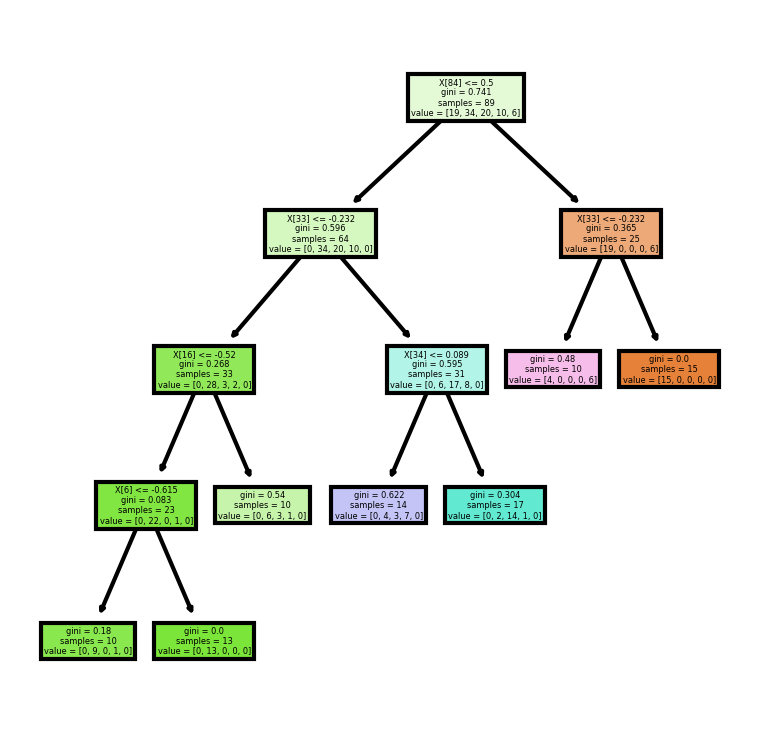

In [ ]:
# Plot a decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf.best_estimator_, filled=True)

In [ ]:
# Check the classes
clf.classes_

array([0, 1, 2, 3, 6])

In [ ]:
# Calculate the weighted AUC for training data

# AUC for training dataset and validation dataset
dt_auc_train = []
dt_auc_val = []
for index in [0,1,2,3,4]:
    
    if index == 4:
        pos_label = 6
    else:
        pos_label = index
        
    # auc for training dataset
    fpr,tpr,thresholds = metrics.roc_curve(dt_y_train,dt_y_train_prob[:,index],pos_label = pos_label)
    dt_auc_t = metrics.auc(fpr,tpr)
    dt_auc_train.append(dt_auc_t)
    
    # auc for validation dataset
    fpr,tpr,thresholds = metrics.roc_curve(dt_y_val,dt_y_val_prob[:,index], pos_label = pos_label)
    dt_auc_v = metrics.auc(fpr,tpr)
    dt_auc_val.append(dt_auc_v)

In [ ]:
# get train AUC dataframe
dt_auc = pd.DataFrame()
dt_auc['Label'] = ['0','1','2','3','6']
dt_auc['Decision Tree Training AUC'] = dt_auc_train
dt_auc['Decision Tree Validation AUC'] = dt_auc_val
dt_auc

,Label,Decision Tree Training AUC,Decision Tree Validation AUC
0,0,0.990977,0.973529
1,1,0.942513,0.844920
2,2,0.936957,0.772727
3,3,0.886709,0.587838
4,6,0.975904,0.860714


In [ ]:
# check value count by label for trainig data
train_class_obs = dt_y_train.value_counts()
train_class_obs

1    34
2    20
0    19
3    10
6     6
Name: label, dtype: int64

In [ ]:
train_class_obs.sum()

89

In [ ]:
# check value count by label for validation data
val_class_obs = dt_y_val.value_counts()
val_class_obs

1    22
2     6
0     5
6     4
3     2
Name: label, dtype: int64

In [ ]:
val_class_obs.sum()

39

In [ ]:
# Decision Tree Model 1:
# get weight average AUC and regular AUC
dt_weight_auc_t = dt_auc_train[0]*((train_class_obs.loc[0])/(train_class_obs.sum())) + dt_auc_train[1]*((train_class_obs.loc[1])/(train_class_obs.sum())) + dt_auc_train[2]*((train_class_obs.loc[2])/(train_class_obs.sum())) + dt_auc_train[3]*(train_class_obs.loc[3]/(train_class_obs.sum())) + dt_auc_train[4]*(train_class_obs.loc[6]/(train_class_obs.sum()))
dt_average_auc_t = dt_auc['Decision Tree Training AUC'].mean()

dt_weight_auc_v = dt_auc_val[0]*((val_class_obs.loc[0])/39) + dt_auc_val[1]*((val_class_obs.loc[1])/(val_class_obs.sum())) + dt_auc_val[2]*((val_class_obs.loc[2])/(val_class_obs.sum())) + dt_auc_val[3]*((val_class_obs.loc[3])/(val_class_obs.sum())) + dt_auc_val[4]*((val_class_obs.loc[6])/(val_class_obs.sum()))
dt_average_auc_v = dt_auc['Decision Tree Validation AUC'].mean()

dt_summary = pd.DataFrame([[dt_weight_auc_t,dt_average_auc_t],[dt_weight_auc_v,dt_average_auc_v]],columns = ['DT1_Weighted_Avg_AUC','DT1_Avg_AUC'],index = ['train','validation'])
dt_summary

,DT1_Weighted_Avg_AUC,DT1_Avg_AUC
train,0.947592,0.946612
validation,0.838738,0.807946


In [ ]:
# Show the confustion matrix for training data
confusion_matrix(y_true = dt_y_train,y_pred = clf.predict(dt_x_train))

array([[15,  0,  0,  0,  4],
       [ 0, 28,  2,  4,  0],
       [ 0,  3, 14,  3,  0],
       [ 0,  2,  1,  7,  0],
       [ 0,  0,  0,  0,  6]])

In [ ]:
# Show the confustion matrix for validation data
confusion_matrix(y_true = dt_y_val,y_pred = clf.predict(dt_x_val))

array([[ 4,  0,  0,  0,  1],
       [ 0, 17,  0,  5,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  1,  0,  1,  0],
       [ 1,  0,  0,  0,  3]])

In [ ]:
# Show the evaluation report for training dataset
dt_report_t = classification_report(y_true = dt_y_train, y_pred = clf.predict(dt_x_train))
print(dt_report_t)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.85      0.82      0.84        34
           2       0.82      0.70      0.76        20
           3       0.50      0.70      0.58        10
           6       0.60      1.00      0.75         6

    accuracy                           0.79        89
   macro avg       0.75      0.80      0.76        89
weighted avg       0.82      0.79      0.79        89



In [ ]:
# evaluation report for validation dataset
dt_report_v = classification_report(y_true = dt_y_val, y_pred = clf.predict(dt_x_val))
print(dt_report_v)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.85      0.77      0.81        22
           2       1.00      0.67      0.80         6
           3       0.17      0.50      0.25         2
           6       0.75      0.75      0.75         4

    accuracy                           0.74        39
   macro avg       0.71      0.70      0.68        39
weighted avg       0.82      0.74      0.77        39



### 5.2.2 Decision Tree Model 2:

In [ ]:
# Decision Tree Attempt 2:
# Use featuers with importance greater than 0 in the previous model

In [ ]:
# Get new train and validation data with features importance > 0
# Show columns with feature importance greater than 0
reduced_columns = imp[imp.imp > 0]
reduced_columns = reduced_columns["var"]
reduced_columns

0                            Y1_Res_No
1                 M6_PANSS_Total_score
2                 Y1_PANSS_Total_score
3                G7: Motor retardation
4    G12: Lack of judgment and insight
Name: var, dtype: object

In [ ]:
# Reduce the number of variable - remove zero-importance features
# train data
dt_x_train_2 = dt_x_train[reduced_columns]
dt_x_train_2.shape

(89, 5)

In [ ]:
# Reduce the number of variable - remove zero-importance features
# validation data
dt_x_val_2 = dt_x_val[reduced_columns]
dt_x_val_2.shape

(39, 5)

In [ ]:
# Use GridSearchCV to train another decision tree model with reduced featuers

# to find the optimal set of parameters with the highest weighted AUC values 

# Step 1) Use the same parameters and potential values as the previous gridsearchCV

parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}


In [ ]:
# Step 2) Create the GridSearchCV object with devault 5-fold cross validation
# Set scoring = "roc_auc_ovr_weighted" to get the best model with the highest weighted AUC score

clf2 = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, n_jobs=4 , scoring = 'roc_auc_ovr_weighted' )
clf2.fit(dt_x_train_2, dt_y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': range(2, 8),
                         'm

In [ ]:
# Show the best parameters for Decision Tree Model 2
clf2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# print the Decision Tree Model 2 best parameters as a Python dictionary
clf2.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [ ]:
# Get the Decision Tree Model 2 predicted probabilities on the training set
dt_y_train_prob_2 = clf2.predict_proba(dt_x_train_2)
dt_y_train_prob_2

array([[0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.28571429, 0.21428571, 0.5       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.

In [ ]:
# Get Decision Tree Model 2 the validation probabilities
dt_y_val_prob_2 = clf2.predict_proba(dt_x_val_2)
dt_y_val_prob_2

array([[0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.6       , 0.3       , 0.1       , 0.        ],
       [0.        , 0.11764706, 0.82352941, 0.05882353, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.        , 0.9       , 0.        , 0.1       , 0.        ],
       [0.4       , 0.        , 0.        , 0.        , 0.6       ],
       [0.        , 0.28571429, 0.

[Text(435.9375, 611.55, 'X[0] <= 0.5\ngini = 0.741\nsamples = 89\nvalue = [19, 34, 20, 10, 6]'),
 Text(290.625, 475.65, 'X[1] <= -0.232\ngini = 0.596\nsamples = 64\nvalue = [0, 34, 20, 10, 0]'),
 Text(174.375, 339.75, 'X[3] <= -0.52\ngini = 0.268\nsamples = 33\nvalue = [0, 28, 3, 2, 0]'),
 Text(116.25, 203.84999999999997, 'X[1] <= -0.882\ngini = 0.083\nsamples = 23\nvalue = [0, 22, 0, 1, 0]'),
 Text(58.125, 67.94999999999993, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(174.375, 67.94999999999993, 'gini = 0.18\nsamples = 10\nvalue = [0, 9, 0, 1, 0]'),
 Text(232.5, 203.84999999999997, 'gini = 0.54\nsamples = 10\nvalue = [0, 6, 3, 1, 0]'),
 Text(406.875, 339.75, 'X[2] <= 0.089\ngini = 0.595\nsamples = 31\nvalue = [0, 6, 17, 8, 0]'),
 Text(348.75, 203.84999999999997, 'gini = 0.622\nsamples = 14\nvalue = [0, 4, 3, 7, 0]'),
 Text(465.0, 203.84999999999997, 'gini = 0.304\nsamples = 17\nvalue = [0, 2, 14, 1, 0]'),
 Text(581.25, 475.65, 'X[1] <= -0.232\ngini = 0.365\nsamples = 

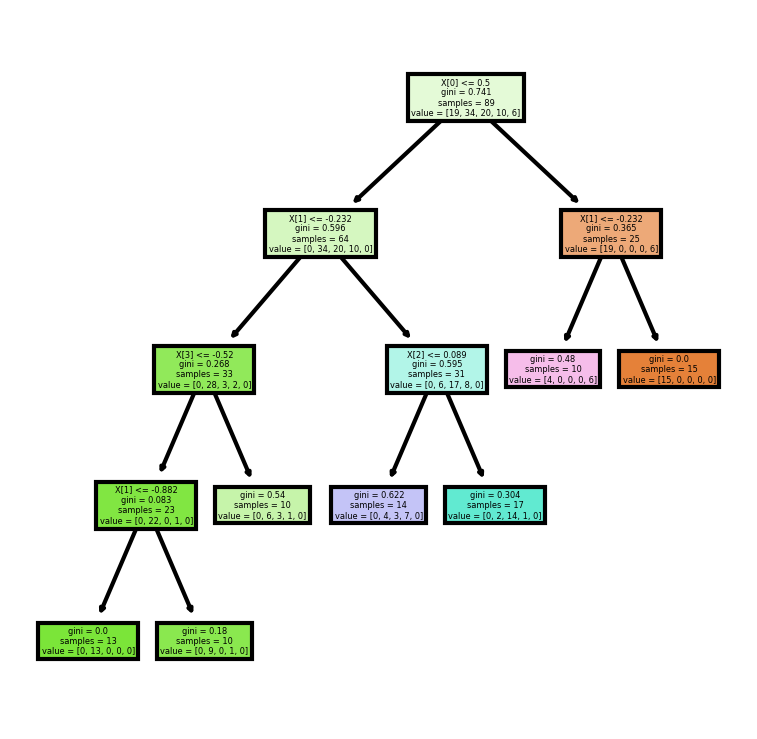

In [ ]:
# Plotting a decision tree for Decision Tree Model 2
# plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf2.best_estimator_, filled=True)

In [ ]:
# Check model 2 classes
clf2.classes_

array([0, 1, 2, 3, 6])

In [ ]:
# Calculate the model 2 weighted AUC for training data

# AUC for training dataset and validation dataset
dt_auc_train_2 = []
dt_auc_val_2 = []
for index in [0,1,2,3,4]:
    
    if index == 4:
        pos_label = 6
    else:
        pos_label = index
        
    # auc for training dataset
    fpr,tpr,thresholds = metrics.roc_curve(dt_y_train,dt_y_train_prob_2[:,index],pos_label = pos_label)
    dt_auc_t_2 = metrics.auc(fpr,tpr)
    dt_auc_train_2.append(dt_auc_t_2)
    
    # auc for validation dataset
    fpr,tpr,thresholds = metrics.roc_curve(dt_y_val,dt_y_val_prob_2[:,index], pos_label = pos_label)
    dt_auc_v_2 = metrics.auc(fpr,tpr)
    dt_auc_val_2.append(dt_auc_v_2)

In [ ]:
# Decision Tree Model 2:
# get AUC dataframe
dt_auc_2 = pd.DataFrame()
dt_auc_2['Label'] = ['0','1','2','3','6']
dt_auc_2['DT Model 2 Training AUC'] = dt_auc_train_2
dt_auc_2['DT Model 2 Validation AUC'] = dt_auc_val_2
dt_auc_2

,Label,DT Model 2 Training AUC,DT Model 2 Validation AUC
0,0,0.990977,0.973529
1,1,0.942513,0.866310
2,2,0.936957,0.772727
3,3,0.886709,0.810811
4,6,0.975904,0.860714


In [ ]:
# check value count by label for trainig data
train_class_obs

1    34
2    20
0    19
3    10
6     6
Name: label, dtype: int64

In [ ]:
# check value count by label for validation
val_class_obs

1    22
2     6
0     5
6     4
3     2
Name: label, dtype: int64

In [ ]:
# Decision Tree Model 2:
# get weight average AUC and regular AUC
dt_weight_auc_t_2 = dt_auc_train_2[0]*((train_class_obs.loc[0])/(train_class_obs.sum())) + dt_auc_train_2[1]*((train_class_obs.loc[1])/(train_class_obs.sum())) + dt_auc_train_2[2]*((train_class_obs.loc[2])/(train_class_obs.sum())) + dt_auc_train_2[3]*(train_class_obs.loc[3]/(train_class_obs.sum())) + dt_auc_train_2[4]*(train_class_obs.loc[6]/(train_class_obs.sum()))
dt_average_auc_t_2 = dt_auc_2['DT Model 2 Training AUC'].mean()

dt_weight_auc_v_2 = dt_auc_val_2[0]*((val_class_obs.loc[0])/39) + dt_auc_val_2[1]*((val_class_obs.loc[1])/(val_class_obs.sum())) + dt_auc_val_2[2]*((val_class_obs.loc[2])/(val_class_obs.sum())) + dt_auc_val_2[3]*((val_class_obs.loc[3])/(val_class_obs.sum())) + dt_auc_val_2[4]*((val_class_obs.loc[6])/(val_class_obs.sum()))
dt_average_auc_v_2 = dt_auc_2['DT Model 2 Validation AUC'].mean()

dt_summary_2 = pd.DataFrame([[dt_weight_auc_t_2,dt_average_auc_t_2],[dt_weight_auc_v_2,dt_average_auc_v_2]],columns = ['DT2_Weighted_Avg_AUC','DT2_Avg_AUC'],index = ['train','validation'])
dt_summary_2

,DT2_Weighted_Avg_AUC,DT2_Avg_AUC
train,0.947592,0.946612
validation,0.862239,0.856818


### 5.2.3 Decision Tree Model Summary

In [ ]:
# Compared to the first Decistion Tree Model
# the DT Model 2 with reduced features shows slightly better weighted AUC performance in validation data
# Since DT Model 2 requires less data gathering and cleaning for fewer number of variables, we should use DT Model 2 with listed parameters:
clf2.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [ ]:
# Decision Tree Model 2 Weighted AUC
dt_summary_2

,DT2_Weighted_Avg_AUC,DT2_Avg_AUC
train,0.947592,0.946612
validation,0.862239,0.856818


In [ ]:
# Decision Tree Model 2
# Show the confustion matrix for training data
confusion_matrix(y_true = dt_y_train,y_pred = clf2.predict(dt_x_train_2))

array([[15,  0,  0,  0,  4],
       [ 0, 28,  2,  4,  0],
       [ 0,  3, 14,  3,  0],
       [ 0,  2,  1,  7,  0],
       [ 0,  0,  0,  0,  6]])

In [ ]:
# Decision Tree Model 2
# Show the confustion matrix for validation data
confusion_matrix(y_true = dt_y_val,y_pred = clf2.predict(dt_x_val_2))

array([[ 4,  0,  0,  0,  1],
       [ 0, 17,  0,  5,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  1,  0,  1,  0],
       [ 1,  0,  0,  0,  3]])

In [ ]:
# Show the evaluation report for training dataset
dt_report_t_2 = classification_report(y_true = dt_y_train, y_pred = clf2.predict(dt_x_train_2))
print(dt_report_t_2)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.85      0.82      0.84        34
           2       0.82      0.70      0.76        20
           3       0.50      0.70      0.58        10
           6       0.60      1.00      0.75         6

    accuracy                           0.79        89
   macro avg       0.75      0.80      0.76        89
weighted avg       0.82      0.79      0.79        89



In [ ]:
# evaluation report for validation dataset
dt_report_v_2 = classification_report(y_true = dt_y_val, y_pred = clf2.predict(dt_x_val_2))
print(dt_report_v_2)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.85      0.77      0.81        22
           2       1.00      0.67      0.80         6
           3       0.17      0.50      0.25         2
           6       0.75      0.75      0.75         4

    accuracy                           0.74        39
   macro avg       0.71      0.70      0.68        39
weighted avg       0.82      0.74      0.77        39



## 5.3 Gradient Tree Boosting

In [ ]:
# copy dataframe for trainging purpose
df_train = df_label.copy()

In [ ]:
# remove rare class
df_train = df_train[df_train['label'] != 5]

In [ ]:
df_train['label'].value_counts()

1    56
2    26
0    24
3    12
6    10
Name: label, dtype: int64

In [ ]:
# reset index
df_train = df_train.reset_index(drop = True)

In [ ]:
# using Stratified Shuffle Split 
sss = StratifiedShuffleSplit(n_splits = 1,test_size = 0.3,random_state = 88)
for train_index, test_index in sss.split(df_train,df_train.label):
    train = df_train.loc[train_index]
    val = df_train.loc[test_index]

In [ ]:
# get training features and target variable
X_train = train.drop(['label'],axis = 1)
y_train = train.label

X_val = val.drop(['label'],axis = 1)
y_val = val.label

In [ ]:
# using features whose importance score is larger than 0.015 as training features
important_f = importance[importance['imp']>=0.015]['var'].values.tolist()
X_train = X_train[important_f]
X_val = X_val[important_f]

In [ ]:
# converting M6_Res into M6_Res_Yes; 
# 0 represents No; 1 represents Yes
M6_Res_Yes_t = pd.get_dummies(X_train.M6_Res,prefix = 'M6_Rem',drop_first = True)
M6_Res_Yes_v = pd.get_dummies(X_val.M6_Res,prefix = 'M6_Rem',drop_first = True)

In [ ]:
# converting Y1_Res into Y1_Res_Yes; 
# 0 represents No; 1 represents Yes
Y1_Res_Yes_t = pd.get_dummies(X_train.Y1_Res,prefix='M6_Res',drop_first = True)
Y1_Res_Yes_v = pd.get_dummies(X_val.Y1_Res,prefix='M6_Res',drop_first = True)

In [ ]:
# replaceing M6_Rem, M6_Res with dummy columns in dataframe
X_train['Y1_Res'] = Y1_Res_Yes_t 
X_train['M6_Res'] = M6_Res_Yes_t

X_val['Y1_Res'] = Y1_Res_Yes_v 
X_val['M6_Res'] = M6_Res_Yes_v

In [ ]:
# using Grid Search to find the best parameters for GradientBoostingClassifier
param = {"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"max_depth":range(3,8),"n_estimators":range(100,150,10),
         'subsample':[0.4,0.5,0.6,0.7,0.8,0.9], 'min_samples_leaf':range(1,10)}

gbrt = GradientBoostingClassifier()
Grid_search_model = RandomizedSearchCV(estimator = gbrt, param_distributions = param, random_state = 30, n_iter = 20,cv = 5, scoring = 'roc_auc_ovr_weighted')
Grid_search_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
Grid_search_model.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Grid_search_model.best_score_

0.938001513736808

In [ ]:
metrics.roc_auc_score(y_train,Grid_search_model.predict_proba(X_train),average = 'weighted',multi_class = 'ovr',labels = [0,1,2,3,6])

1.0

In [ ]:
metrics.roc_auc_score(y_val,Grid_search_model.predict_proba(X_val),average = 'weighted',multi_class = 'ovr', labels = [0,1,2,3,6])

0.8904587422732584

In [ ]:
Grid_search_model.scorer_

make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr, average=weighted)

In [ ]:
#Grid_search_model = GradientBoostingClassifier(learning_rate = 0.8, max_depth = 6, n_estimators = 130, subsample = 0.8)
#Grid_search_model.fit(X_train,y_train)

In [ ]:
# evaluation report for training dataset
report_t = classification_report(y_true = y_train, y_pred = Grid_search_model.predict(X_train))
print(report_t)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [ ]:
# evaluation report for validation dataset
report_v = classification_report(y_true = y_val, y_pred = Grid_search_model.predict(X_val))
print(report_v)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.71      0.59      0.65        17
           2       0.60      0.75      0.67         8
           3       0.20      0.25      0.22         4
           6       0.50      0.67      0.57         3

    accuracy                           0.62        39
   macro avg       0.57      0.59      0.57        39
weighted avg       0.64      0.62      0.62        39



In [ ]:
# predict probability for training dataset
y_train_prob = Grid_search_model.predict_proba(X_train)
# predict probability for validation dataset
y_val_prob = Grid_search_model.predict_proba(X_val)

In [ ]:
Grid_search_model.classes_

array([0, 1, 2, 3, 6])

In [ ]:
# confusion matrix on training dataset
metrics.confusion_matrix(y_train, Grid_search_model.predict(X_train))

array([[17,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  7]])

In [ ]:
# confusion matrix on validation dataset
metrics.confusion_matrix(y_val,Grid_search_model.predict(X_val))

array([[ 5,  0,  0,  0,  2],
       [ 0, 10,  3,  4,  0],
       [ 0,  2,  6,  0,  0],
       [ 0,  2,  1,  1,  0],
       [ 1,  0,  0,  0,  2]])

In [ ]:
Grid_search_model.classes_

array([0, 1, 2, 3, 6])

In [ ]:
# check predict probability result
y_train_prob

In [ ]:
# AUC for training dataset and validation dataset
auc_train = []
auc_val = []
for index in [0,1,2,3,4]:
    
    if index == 4:
        pos_label = 6
    else:
        pos_label = index
        
    # auc for training dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_train,y_train_prob[:,index],pos_label = pos_label)
    auc_t = metrics.auc(fpr,tpr)
    auc_train.append(auc_t)
    
    # auc for validation dataset
    fpr,tpr,thresholds = metrics.roc_curve(y_val,y_val_prob[:,index], pos_label = pos_label)
    auc_v = metrics.auc(fpr,tpr)
    auc_val.append(auc_v)

In [ ]:
# get AUC dataframe
auc = pd.DataFrame()
auc['Class'] = ['class 0','class 1','class 2','calss 3','class 6']
auc['AUC_train'] = auc_train
auc['AUC_val'] = auc_val
auc

,Class,AUC_train,AUC_val
0,class 0,1.0,0.977679
1,class 1,1.0,0.879679
2,class 2,1.0,0.883065
3,calss 3,1.0,0.785714
4,class 6,1.0,0.907407


In [ ]:
auc_gradient = auc.copy()

In [ ]:
# get weight average AUC and regular AUC
weight_auc_t = auc_train[0]*(17/89) + auc_train[1]*(39/89) + auc_train[2]*(18/89) + auc_train[3]*(8/89) + auc_train[4]*(7/89)
average_auc_t = auc['AUC_train'].mean()

weight_auc_v = auc_val[0]*(7/39) + auc_val[1]*(17/39) + auc_val[2]*(8/39) + auc_val[3]*(4/39) + auc_val[4]*(3/39)
average_auc_v = auc['AUC_val'].mean()

summary = pd.DataFrame([[weight_auc_t,average_auc_t],[weight_auc_v,average_auc_v]],columns = ['weighted average AUC','average AUC'],index = ['train','validation'])
summary

,weighted average AUC,average AUC
train,1.000000,1.000000
validation,0.890459,0.886709


In [ ]:
auc_gradient_weighted = summary.copy()

## 5.4 Neural Networks - Perceptron

In [ ]:
df_train.shape

(128, 53)

In [ ]:
#Converting data to TensorFlow dataset
x_train_tf=tf.convert_to_tensor(X_train)
y_train_tf=tf.convert_to_tensor(y_train)
x_val_tf=tf.convert_to_tensor(X_val)
y_val_tf=tf.convert_to_tensor(y_val)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
nn_model= Sequential()
#Input Layer
nn_model.add(Dense(6, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer='l2'))
#Hidden Layer
nn_model.add(Dense(6, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer='l2'))
#Output Layer
nn_model.add(Dense(7, activation='softmax', kernel_initializer='glorot_normal'))
#Compiling the neural network
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),loss='sparse_categorical_crossentropy', metrics =['accuracy'])


In [ ]:
nn_estimator= nn_model.fit(x_train_tf,y_train_tf, batch_size= 10,  validation_data=(x_val_tf, y_val_tf), epochs=250) 
history= nn_estimator

In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 49        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [ ]:
eval_nn_model=nn_model.evaluate(x_train_tf,y_train_tf)
eval_nn_model

3/3 [==============================] - 0s 17ms/step - loss: 0.4148 - accuracy: 0.8652


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.4147844612598419, 0.8651685118675232]

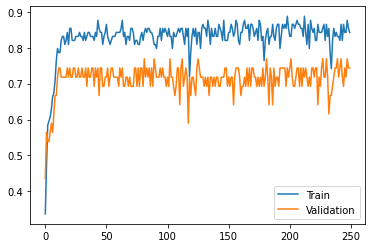

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

# **Part 6: Comparing Model Performance**

### 6.1 Classifiaction Report

In [ ]:
# Logistic Regression
# evaluation report for training dataset
print(report_t1)
# evaluation report for validation dataset
print(report_v1)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      1.00      1.00        35
           2       0.86      0.95      0.90        19
           3       0.86      0.67      0.75         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         7

    accuracy                           0.87        91
   macro avg       0.57      0.60      0.58        91
weighted avg       0.81      0.87      0.83        91

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.70      0.76      0.73        21
           2       0.43      0.43      0.43         7
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.27

In [ ]:
# Gradient Tree Boosting
# evaluation report for training dataset
print(report_t)
# evaluation report for validation dataset
print(report_v)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.71      0.59      0.65        17
           2       0.60      0.75      0.67         8
           3       0.20      0.25      0.22         4
           6       0.50      0.67      0.57         3

    accuracy                           0.62        39
   macro avg       0.57      0.59      0.57        39
weighted avg       0.64      0.62      0.62        39



In [ ]:
# Regular Decision Tree Model
# Show the evaluation report for training dataset
print(dt_report_t_2)
# evaluation report for validation dataset
print(dt_report_v_2)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.85      0.82      0.84        34
           2       0.82      0.70      0.76        20
           3       0.50      0.70      0.58        10
           6       0.60      1.00      0.75         6

    accuracy                           0.79        89
   macro avg       0.75      0.80      0.76        89
weighted avg       0.82      0.79      0.79        89

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.85      0.77      0.81        22
           2       1.00      0.67      0.80         6
           3       0.17      0.50      0.25         2
           6       0.75      0.75      0.75         4

    accuracy                           0.74        39
   macro avg       0.71      0.70      0.68        39
weighted avg       0.82      0.74      0.77        39



### 6.2 Model AUC Performance

In [ ]:
# logistic regression
print(auc_logistic)
print(auc_logistic_weighted)

     Class  AUC_train   AUC_val
0  class 0   0.990141  0.944444
1  class 1   1.000000  0.749373
2  class 2   0.991959  0.844156
3  calss 3   0.987805  0.288288
4  class 6   0.778912  0.918919
            weighted average AUC  average AUC
train                   0.979813     0.949763
validation              0.782708     0.749036


In [ ]:
# gradient tree boosting
print(auc_gradient)
print(auc_gradient_weighted)

     Class  AUC_train   AUC_val
0  class 0        1.0  0.977679
1  class 1        1.0  0.879679
2  class 2        1.0  0.883065
3  calss 3        1.0  0.785714
4  class 6        1.0  0.907407
            weighted average AUC  average AUC
train                   1.000000     1.000000
validation              0.890459     0.886709


In [ ]:
# regular decision tree
print(dt_auc_2)
print(dt_summary_2)

  Label  DT Model 2 Training AUC  DT Model 2 Validation AUC
0     0                 0.990977                   0.973529
1     1                 0.942513                   0.866310
2     2                 0.936957                   0.772727
3     3                 0.886709                   0.810811
4     6                 0.975904                   0.860714
            DT2_Weighted_Avg_AUC  DT2_Avg_AUC
train                   0.947592     0.946612
validation              0.862239     0.856818
